In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd())) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime, timedelta

from src.constants import hustle_stats
from src.steps.model.model import CompositeEffort

pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = '../data/'
input_path = os.path.join(DATA_DIR, 'transformed_data', 'df_transformed.csv')
df_trans = pd.read_csv(input_path)
#lgl_path = os.path.join(DATA_DIR, 'df_logs.csv')
#input_path = os.path.join(DATA_DIR, 'transformed_data', 'df_transformed.csv')

# Read in Data
#df_logs = pd.read_csv(lgl_path)


In [3]:
# Features
features_to_exclude = ['CONTESTED_SHOTS','BOX_OUTS', 'SCREEN_AST_PTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'LOOSE_BALLS_RECOVERED','BOX_OUT_PLAYER_REBS']
features = list(set(hustle_stats)-set(features_to_exclude))
home_features = [f"HOME_{feat}" for feat in features]
away_features = [f"AWAY_{feat}" for feat in features]
features = home_features + away_features


In [11]:
df_trans[['HOME_NRtg','AWAY_NRtg']].describe()

HOME_NRtg    AWAY_NRtg
count  3690.000000  3690.000000
mean      2.006932    -2.006932
std      15.389296    15.389296
min     -53.735623   -60.495805
25%      -8.749641   -12.061986
50%       2.776396    -2.776396
75%      12.061986     8.749641
max      60.495805    53.735623

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     25.82
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.40e-43
Time:                        21:57:18   Log-Likelihood:                -15210.
No. Observations:                3690   AIC:                         3.044e+04
Df Residuals:                    3680   BIC:                         3.050e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

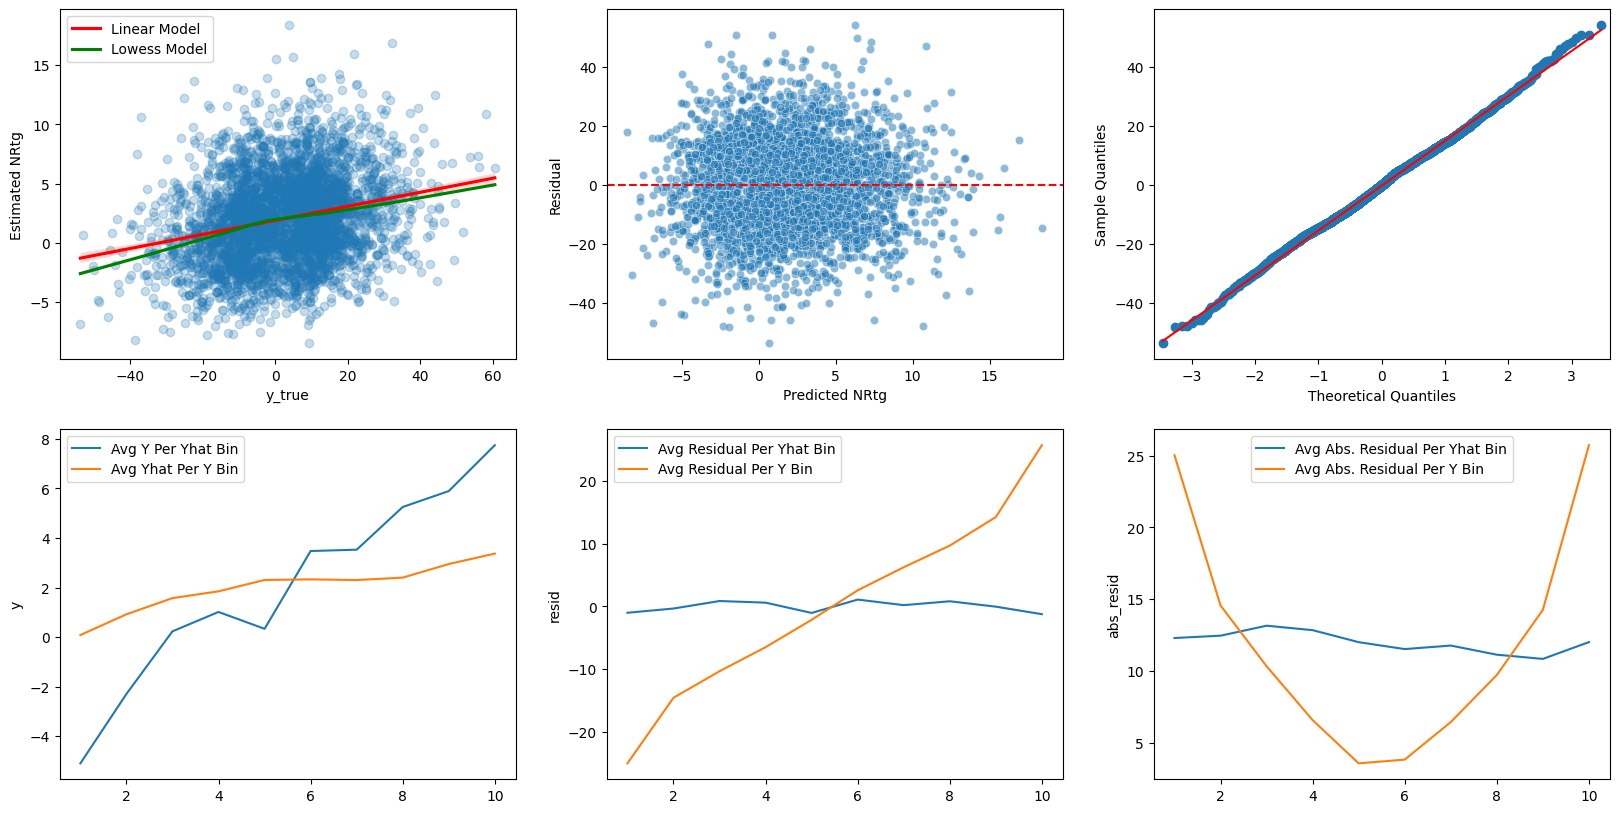

In [4]:
# Model 1 - Just use home team info to obtain weights
X_m1 = df_trans[home_features]
y_m1 = df_trans['HOME_NRtg']

comp_eff_m1 = CompositeEffort(X=X_m1, y=y_m1)
m1_stage1 = comp_eff_m1.estimate_stage1_model()

/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/nba_hustle_sdg/nba_hustle_sdg/src/steps/model/model.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec


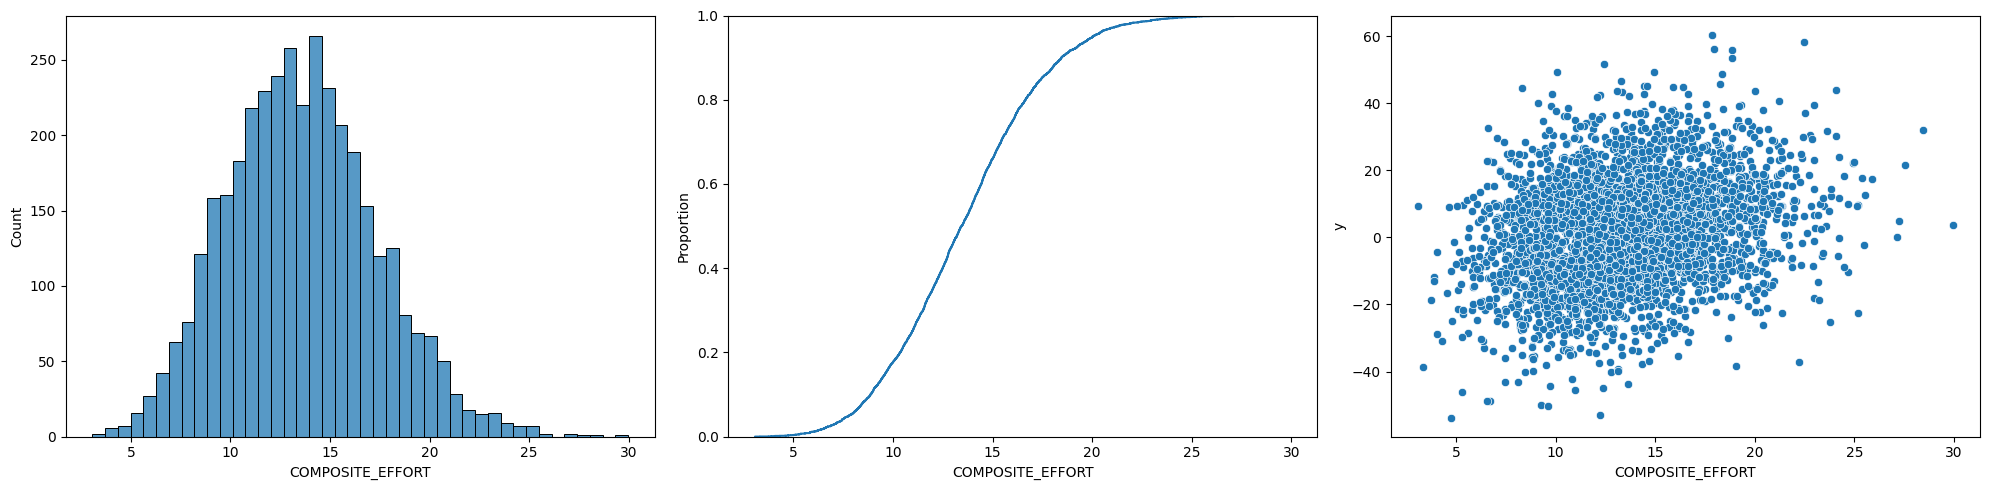

count    3690.000000
mean       13.588601
std         3.750872
min         3.071426
0.1%        3.910243
1%          5.843124
5%          7.797042
10%         8.868844
20%        10.363270
25%        10.965149
30%        11.509885
40%        12.493973
50%        13.443966
60%        14.433771
70%        15.420849
75%        16.011475
80%        16.651763
90%        18.457860
95%        20.020187
99%        23.170699
99.9%      27.168009
max        29.968308
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.244, P-value:  0.00000
Spearman Correlation:  0.231, P-value:  0.00000
Kendall's Tau Correlation:  0.155, P-value:  0.00000


In [13]:
output_dir_m1 = os.path.join(DATA_DIR, 'stage1_effort_m1')
df_stage1_effort_m1 = comp_eff_m1.estimate_composite_effort(output_dir=output_dir_m1)

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     5.103
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.18e-06
Time:                        22:39:57   Log-Likelihood:                -2280.3
No. Observations:                 575   AIC:                             4581.
Df Residuals:                     565   BIC:                             4624.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

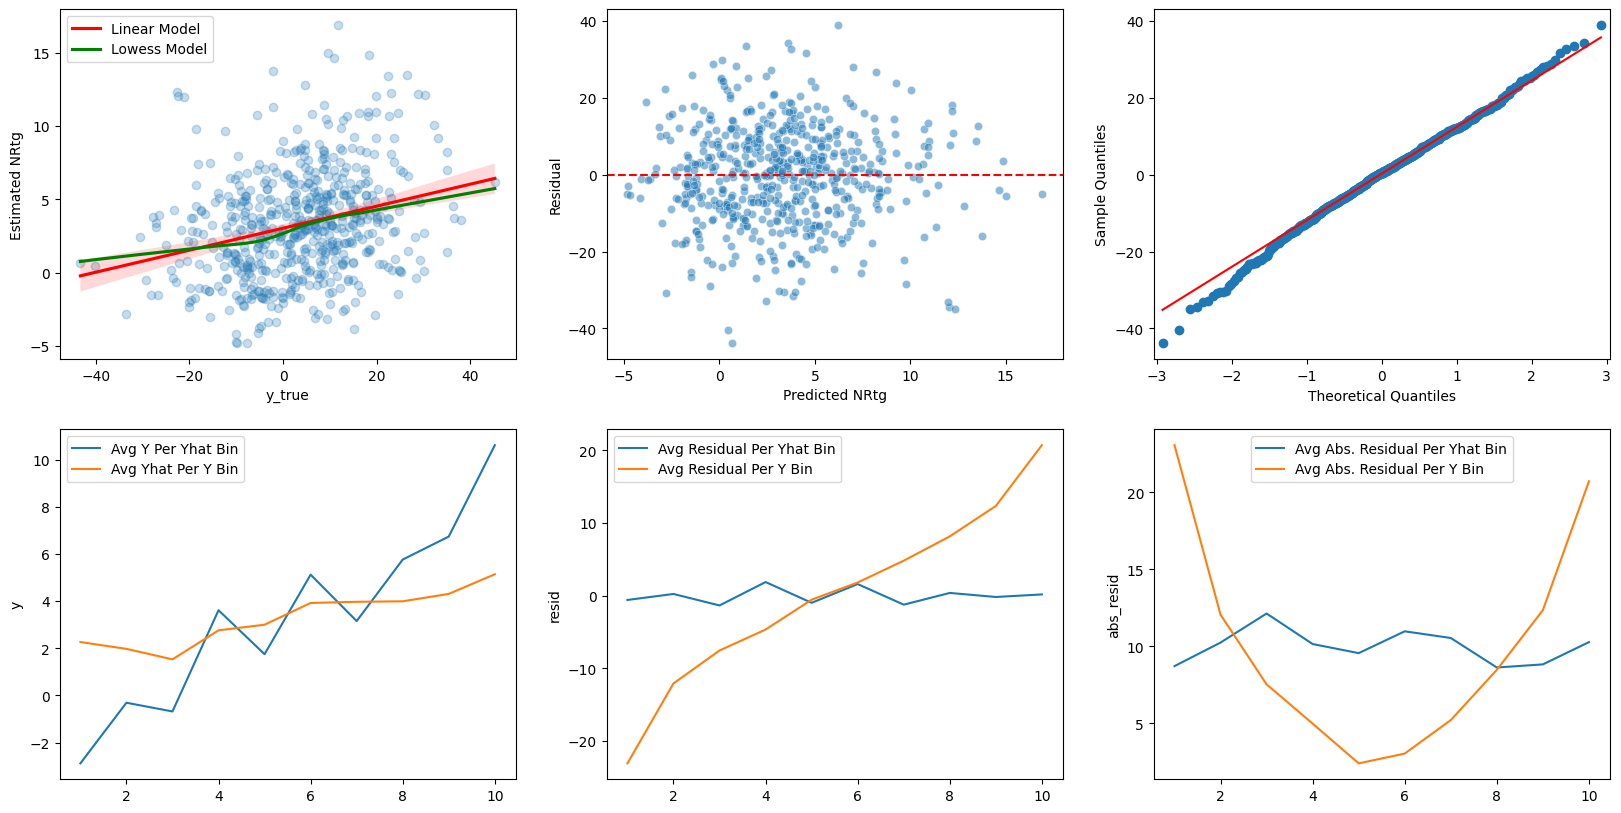

In [5]:
# Model 1 - Just use home team info to obtain weights
X_m1 = df_trans[home_features]
y_m1 = df_trans['HOME_NRtg']

comp_eff_m1 = CompositeEffort(X=X_m1, y=y_m1)
m1_stage1 = comp_eff_m1.estimate_stage1_model()

                            OLS Regression Results                            
Dep. Variable:              AWAY_NRtg   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     22.69
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           5.57e-38
Time:                        21:59:22   Log-Likelihood:                -15223.
No. Observations:                3690   AIC:                         3.047e+04
Df Residuals:                    3680   BIC:                         3.053e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

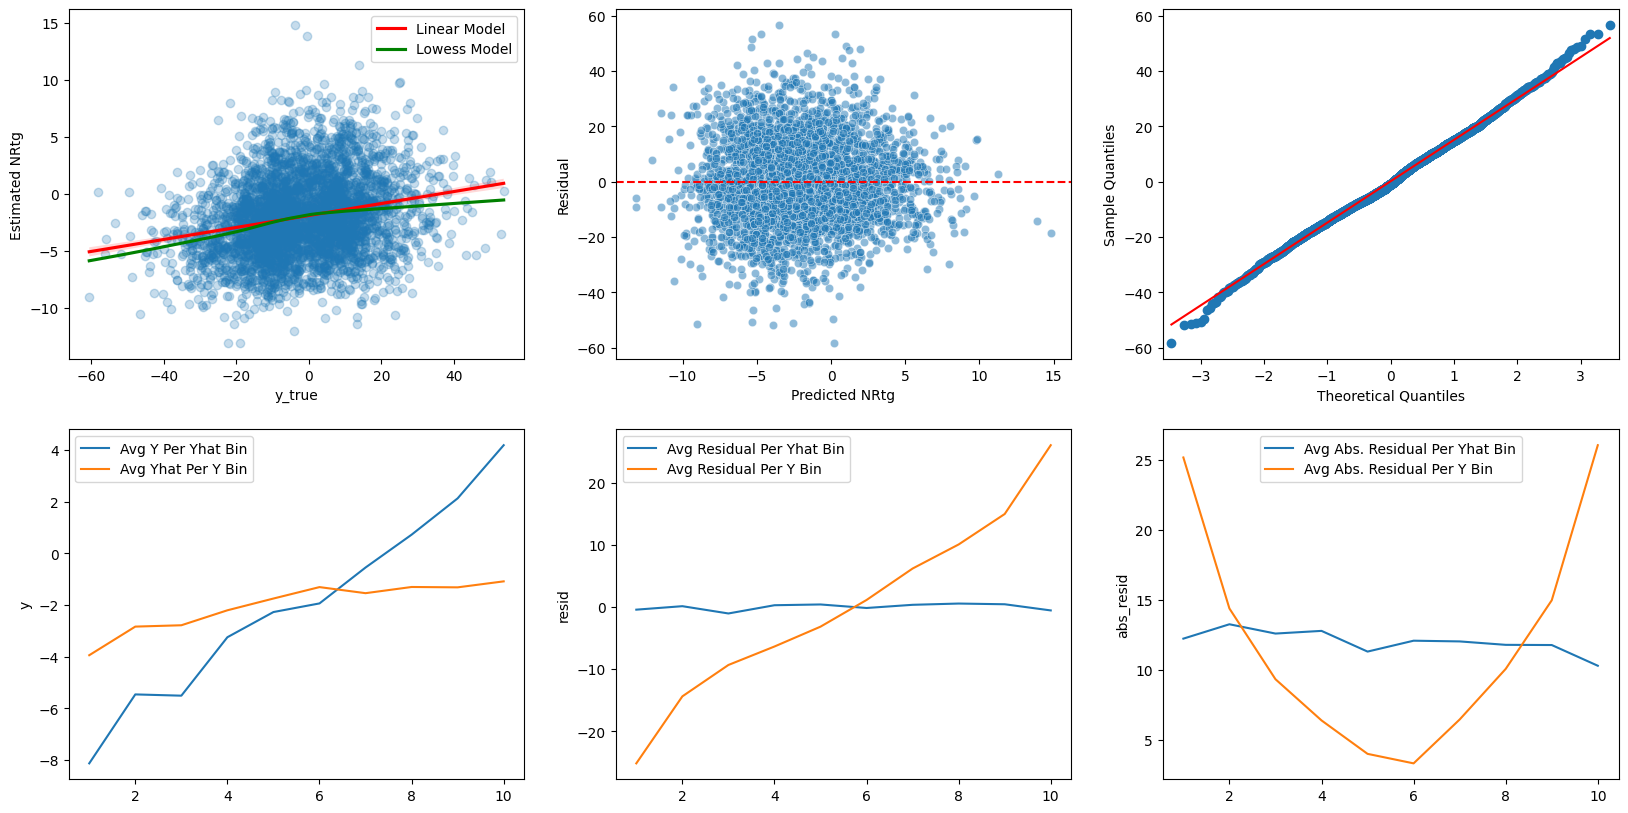

In [5]:
# Model 1b - Just use away team info to obtain weights
X_m1b = df_trans[away_features]
y_m1b = df_trans['AWAY_NRtg']

comp_eff_m1b = CompositeEffort(X=X_m1b, y=y_m1b)
m1b_stage1 = comp_eff_m1b.estimate_stage1_model()

/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/nba_hustle_sdg/nba_hustle_sdg/src/steps/model/model.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec


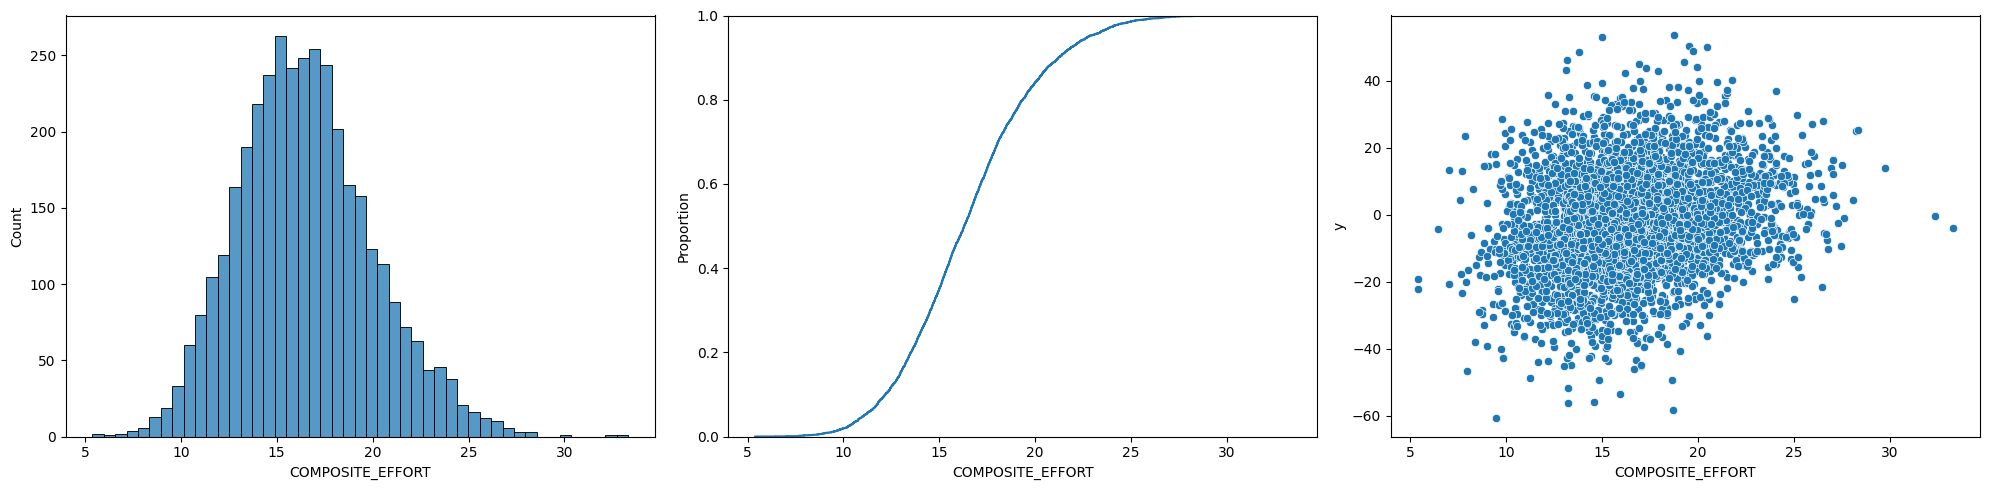

count    3690.000000
mean       16.505736
std         3.528530
min         5.392581
0.1%        7.050357
1%          9.304737
5%         11.079192
10%        12.179417
20%        13.504360
25%        14.041507
30%        14.528106
40%        15.395789
50%        16.296071
60%        17.161413
70%        18.061467
75%        18.672130
80%        19.338069
90%        21.217525
95%        22.770434
99%        25.590537
99.9%      28.280081
max        33.312762
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.229, P-value:  0.00000
Spearman Correlation:  0.230, P-value:  0.00000
Kendall's Tau Correlation:  0.154, P-value:  0.00000


In [14]:
output_dir_m1b = os.path.join(DATA_DIR, 'stage1_effort_m1b')
df_stage1_effort_m1b = comp_eff_m1b.estimate_composite_effort(output_dir=output_dir_m1b)

                            OLS Regression Results                            
Dep. Variable:              AWAY_NRtg   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     4.059
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           4.64e-05
Time:                        22:42:06   Log-Likelihood:                -2284.7
No. Observations:                 575   AIC:                             4589.
Df Residuals:                     565   BIC:                             4633.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

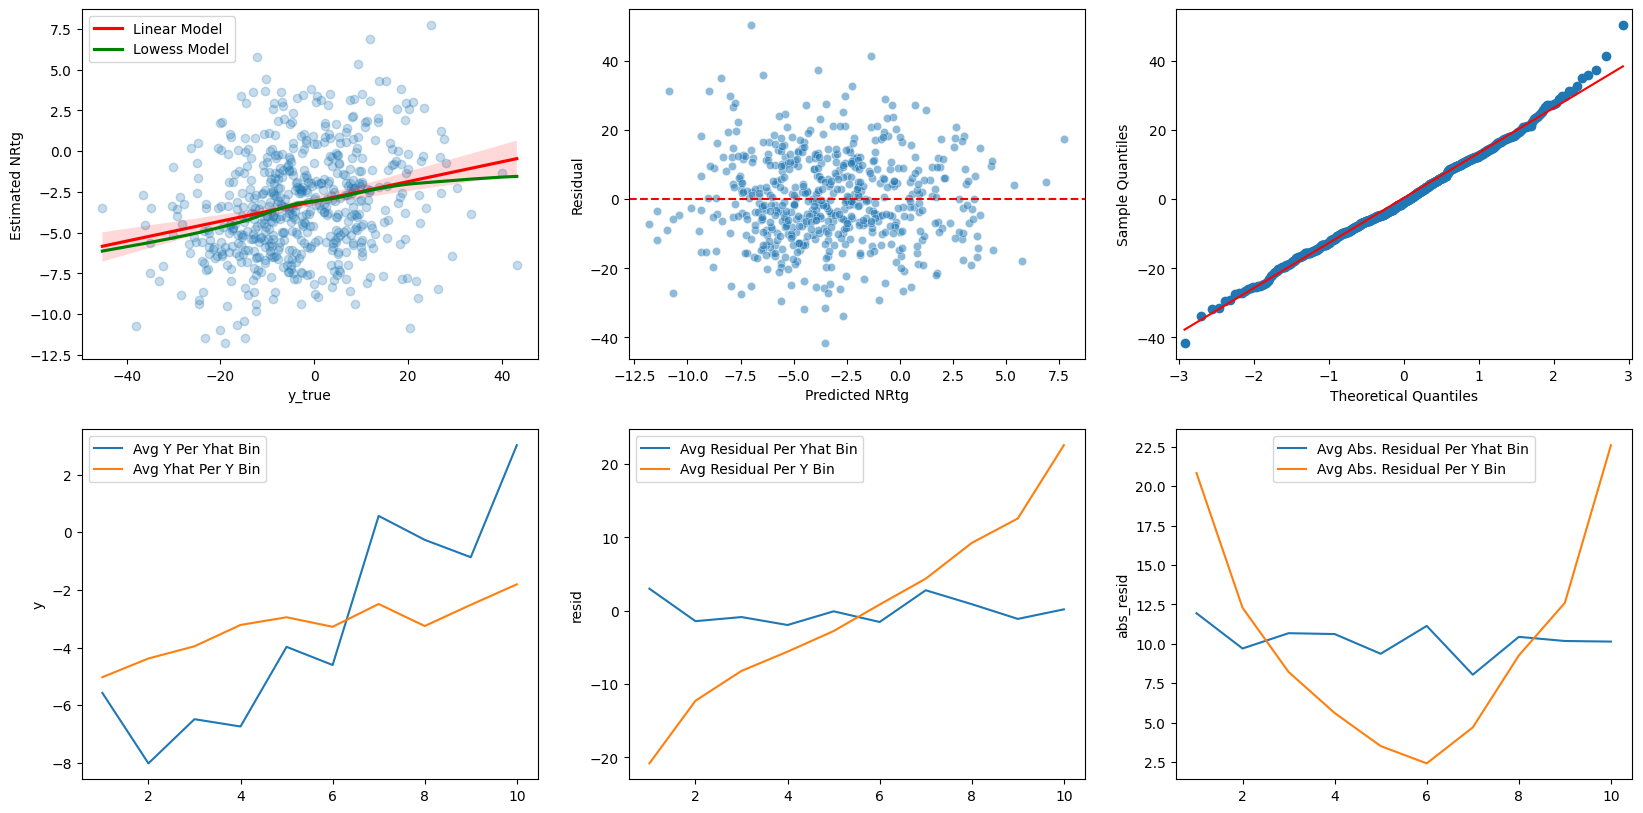

In [6]:
# Model 1b - Just use away team info to obtain weights
X_m1b = df_trans[away_features]
y_m1b = df_trans['AWAY_NRtg']

comp_eff_m1b = CompositeEffort(X=X_m1b, y=y_m1b)
m1b_stage1 = comp_eff_m1b.estimate_stage1_model()

In [6]:
# Model 2 - Stack Home and Away (no sign changes)
X_m2 = pd.concat([df_trans[home_features], df_trans[away_features]], ignore_index=True)
y_m2 = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

In [9]:
X_m2.head()

HOME_DEF_BOXOUTS  HOME_OFF_BOXOUTS  HOME_OFF_LOOSE_BALLS_RECOVERED  \
0               2.0               0.0                             2.0   
1              11.0               3.0                             1.0   
2              11.0               1.0                             4.0   
3               5.0               3.0                             3.0   
4               8.0               1.0                             1.0   

   HOME_CHARGES_DRAWN  HOME_DEF_LOOSE_BALLS_RECOVERED  HOME_SCREEN_ASSISTS  \
0                 2.0                             2.0                 10.0   
1                 1.0                             2.0                 18.0   
2                 0.0                             4.0                  8.0   
3                 1.0                             2.0                  8.0   
4                 1.0                             5.0                 13.0   

   HOME_DEFLECTIONS  HOME_CONTESTED_SHOTS_3PT  HOME_CONTESTED_SHOTS_2PT  \
0              16.0                      15.0                      19.0   
1              22.0                      33.0                      30.0   
2              15.0                      19.0                      40.0   
3              12.0                      21.0                      41.0   
4              16.0                      28.0                      39.0   

   AWAY_DEF_BOXOUTS  AWAY_OFF_BOXOUTS  AWAY_OFF_LOOSE_BALLS_RECOVERED  \
0               NaN               NaN                             NaN   
1               NaN               NaN                             NaN   
2               NaN               NaN                             NaN   
3               NaN               NaN                             NaN   
4               NaN               NaN                             NaN   

   AWAY_CHARGES_DRAWN  AWAY_DEF_LOOSE_BALLS_RECOVERED  AWAY_SCREEN_ASSISTS  \
0                 NaN                             NaN                  NaN   
1                 NaN                             NaN                  NaN   
2                 NaN                             NaN                  NaN   
3                 NaN                             NaN                  NaN   
4                 NaN                             NaN                  NaN   

   AWAY_DEFLECTIONS  AWAY_CONTESTED_SHOTS_3PT  AWAY_CONTESTED_SHOTS_2PT  
0               NaN                       NaN                       NaN  
1               NaN                       NaN                       NaN  
2               NaN                       NaN                       NaN  
3               NaN                       NaN                       NaN  
4               NaN                       NaN                       NaN

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     46.74
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           1.43e-82
Time:                        22:00:05   Log-Likelihood:                -30503.
No. Observations:                7380   AIC:                         6.103e+04
Df Residuals:                    7370   BIC:                         6.109e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

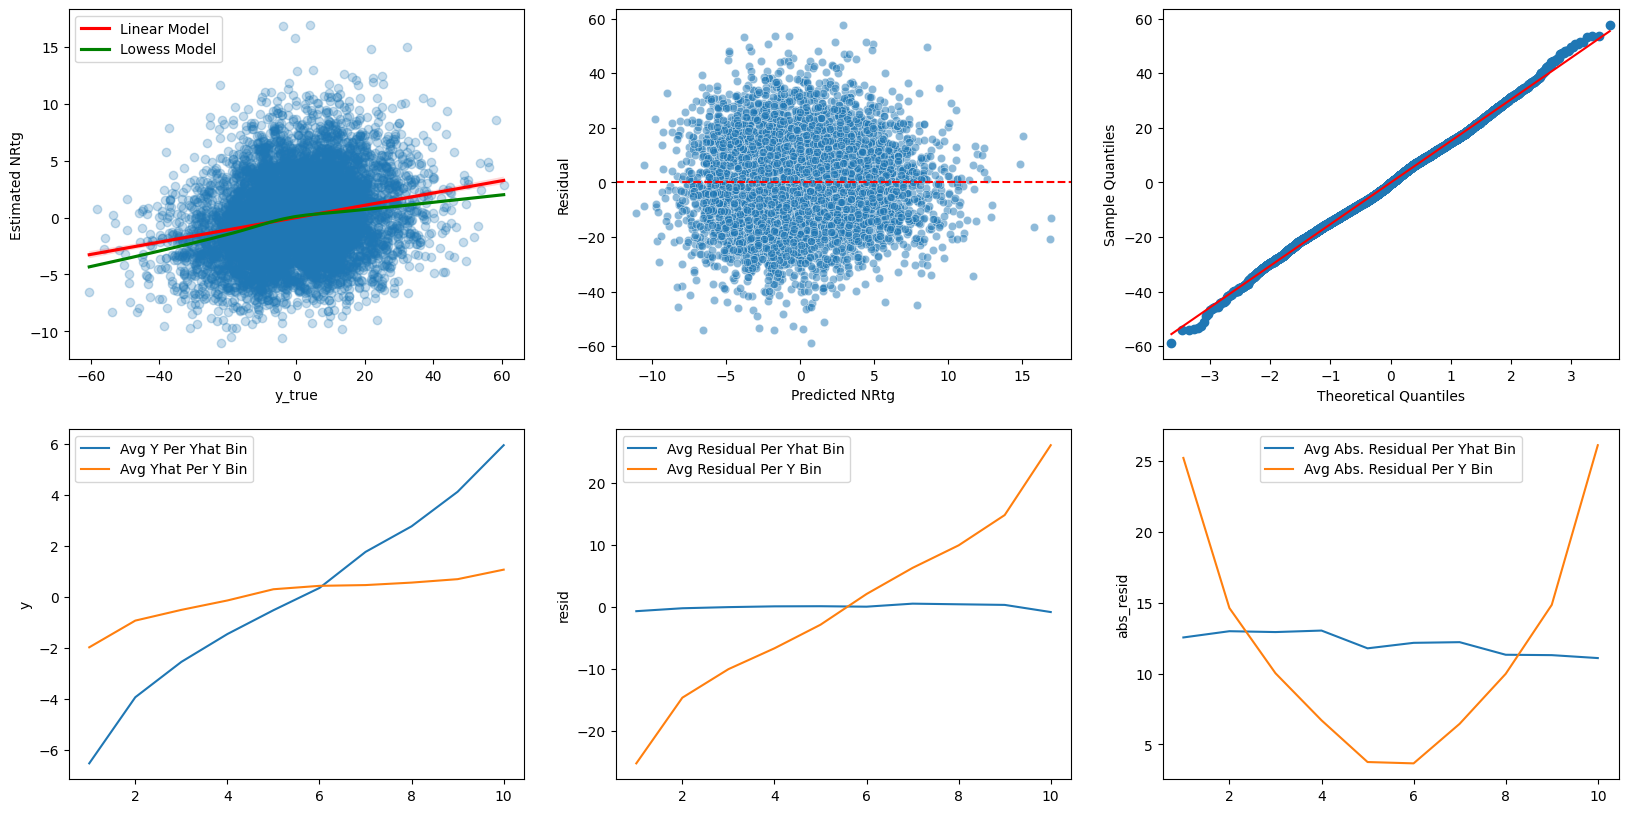

In [7]:
# Model 2 - Stack Home and Away (no sign changes)
X_m2_home = df_trans[home_features]
X_m2_away = df_trans[away_features]
X_m2_home.columns = X_m2_home.columns.str.replace('HOME_','')
X_m2_away.columns = X_m2_away.columns.str.replace('AWAY_','')
X_m2 = pd.concat([X_m2_home, X_m2_away], ignore_index=True)
y_m2 = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

comp_eff_m2 = CompositeEffort(X=X_m2, y=y_m2)
m2_stage1 = comp_eff_m2.estimate_stage1_model()

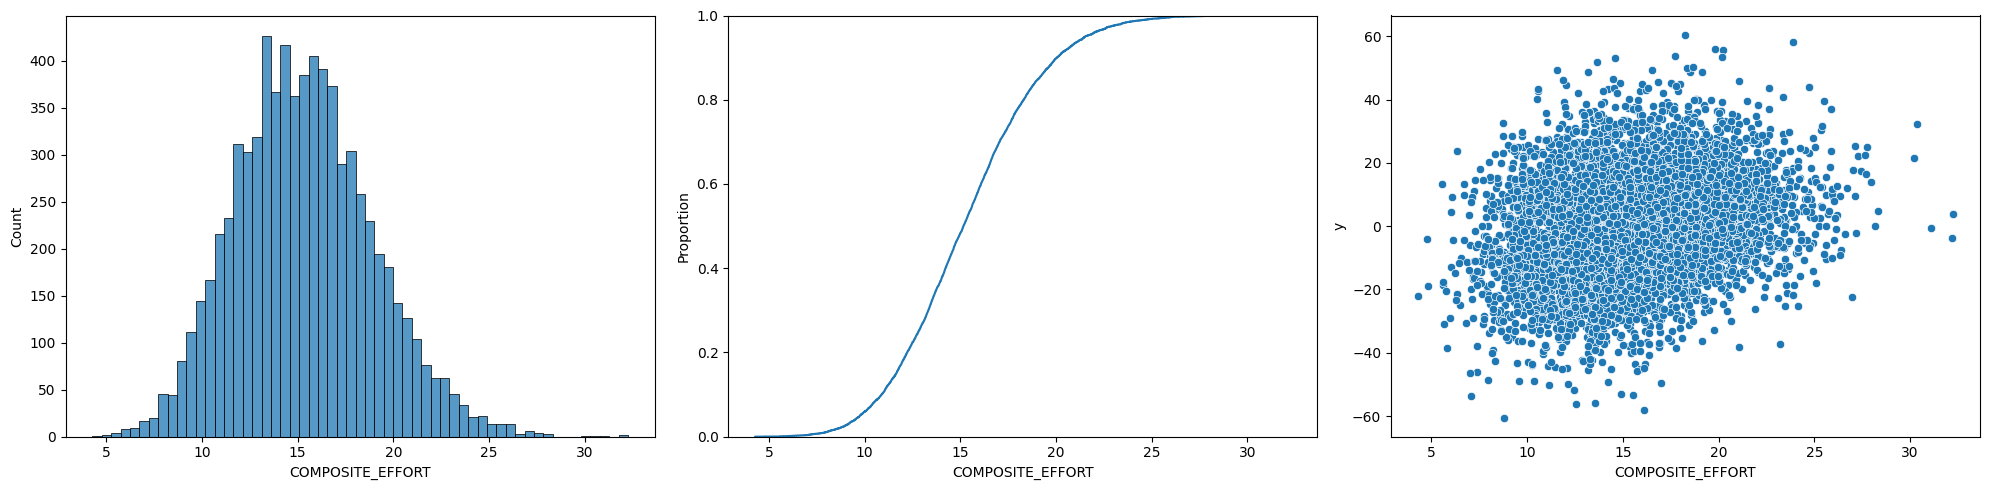

count    7380.000000
mean       15.341821
std         3.606048
min         4.279072
0.1%        5.780915
1%          7.927245
5%          9.765206
10%        10.888496
20%        12.222331
25%        12.820193
30%        13.330662
40%        14.226038
50%        15.165432
60%        16.081307
70%        17.046947
75%        17.659459
80%        18.321919
90%        20.050562
95%        21.523708
99%        24.655489
99.9%      27.877949
max        32.256968
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.232, P-value:  0.00000
Spearman Correlation:  0.227, P-value:  0.00000
Kendall's Tau Correlation:  0.152, P-value:  0.00000


In [15]:
output_dir_m2 = os.path.join(DATA_DIR, 'stage1_effort_m2')
df_stage1_effort_m2 = comp_eff_m2.estimate_composite_effort(output_dir=output_dir_m2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.124
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           9.35e-12
Time:                        22:47:07   Log-Likelihood:                -4604.0
No. Observations:                1150   AIC:                             9228.
Df Residuals:                    1140   BIC:                             9278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

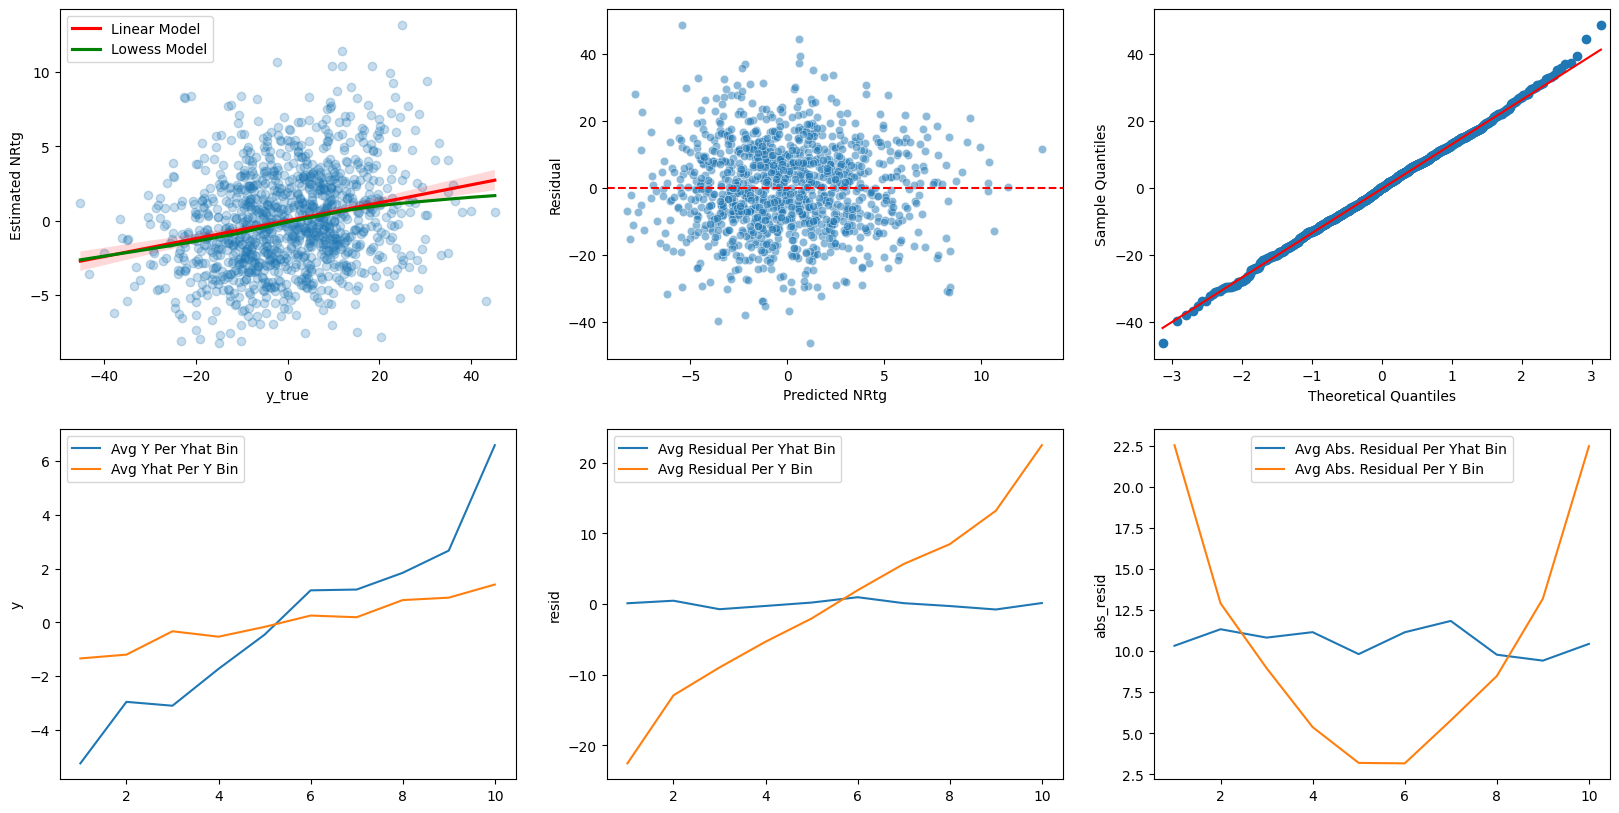

In [10]:
# Model 2 - Stack Home and Away (no sign changes)
X_m2_home = df_trans[home_features]
X_m2_away = df_trans[away_features]
X_m2_home.columns = X_m2_home.columns.str.replace('HOME_','')
X_m2_away.columns = X_m2_away.columns.str.replace('AWAY_','')
X_m2 = pd.concat([X_m2_home, X_m2_away], ignore_index=True)
y_m2 = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

comp_eff_m2 = CompositeEffort(X=X_m2, y=y_m2)
m2_stage1 = comp_eff_m2.estimate_stage1_model()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.23
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           7.27e-25
Time:                        22:00:34   Log-Likelihood:                -30640.
No. Observations:                7380   AIC:                         6.130e+04
Df Residuals:                    7370   BIC:                         6.137e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

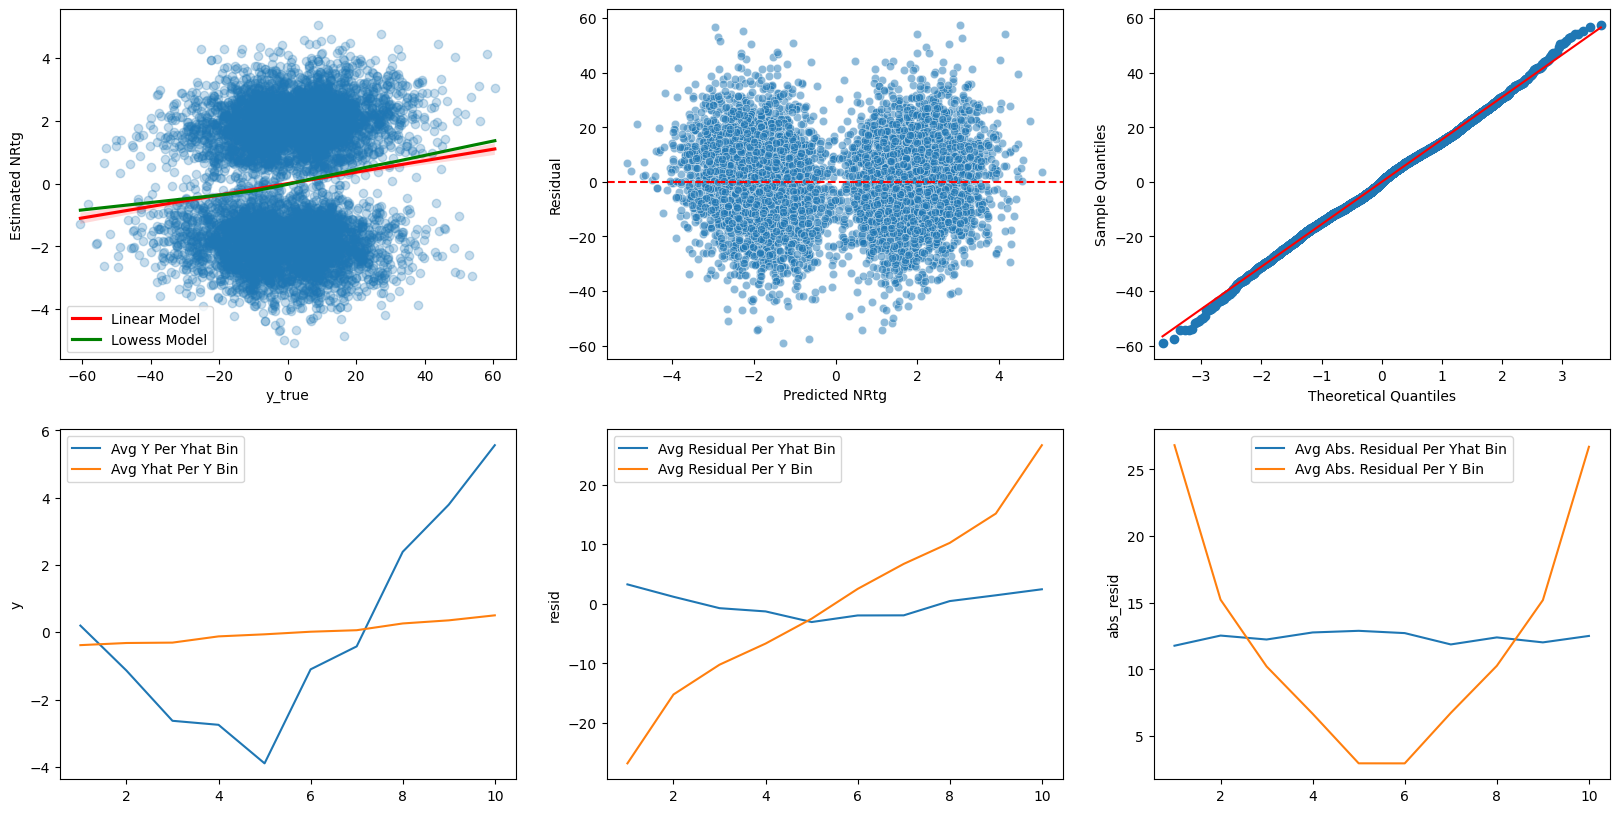

In [8]:
# Model 2 - Stack Home and Away (w/ sign changes)
X_m2b_home = df_trans[home_features]
X_m2b_away = df_trans[away_features]
X_m2b_home.columns = X_m2b_home.columns.str.replace('HOME_','')
X_m2b_away.columns = X_m2b_away.columns.str.replace('AWAY_','')
X_m2b = pd.concat([X_m2b_home, -X_m2b_away], ignore_index=True)
y_m2b = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

comp_eff_m2b = CompositeEffort(X=X_m2b, y=y_m2b)
m2b_stage1 = comp_eff_m2b.estimate_stage1_model()

In [18]:
output_dir_m2b = os.path.join(DATA_DIR, 'stage1_effort_m2b')
df_stage1_effort_m2b = comp_eff_m2b.estimate_composite_effort(output_dir=output_dir_m2b)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 10)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.372
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           3.60e-12
Time:                        22:49:41   Log-Likelihood:                -4602.9
No. Observations:                1150   AIC:                             9226.
Df Residuals:                    1140   BIC:                             9276.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

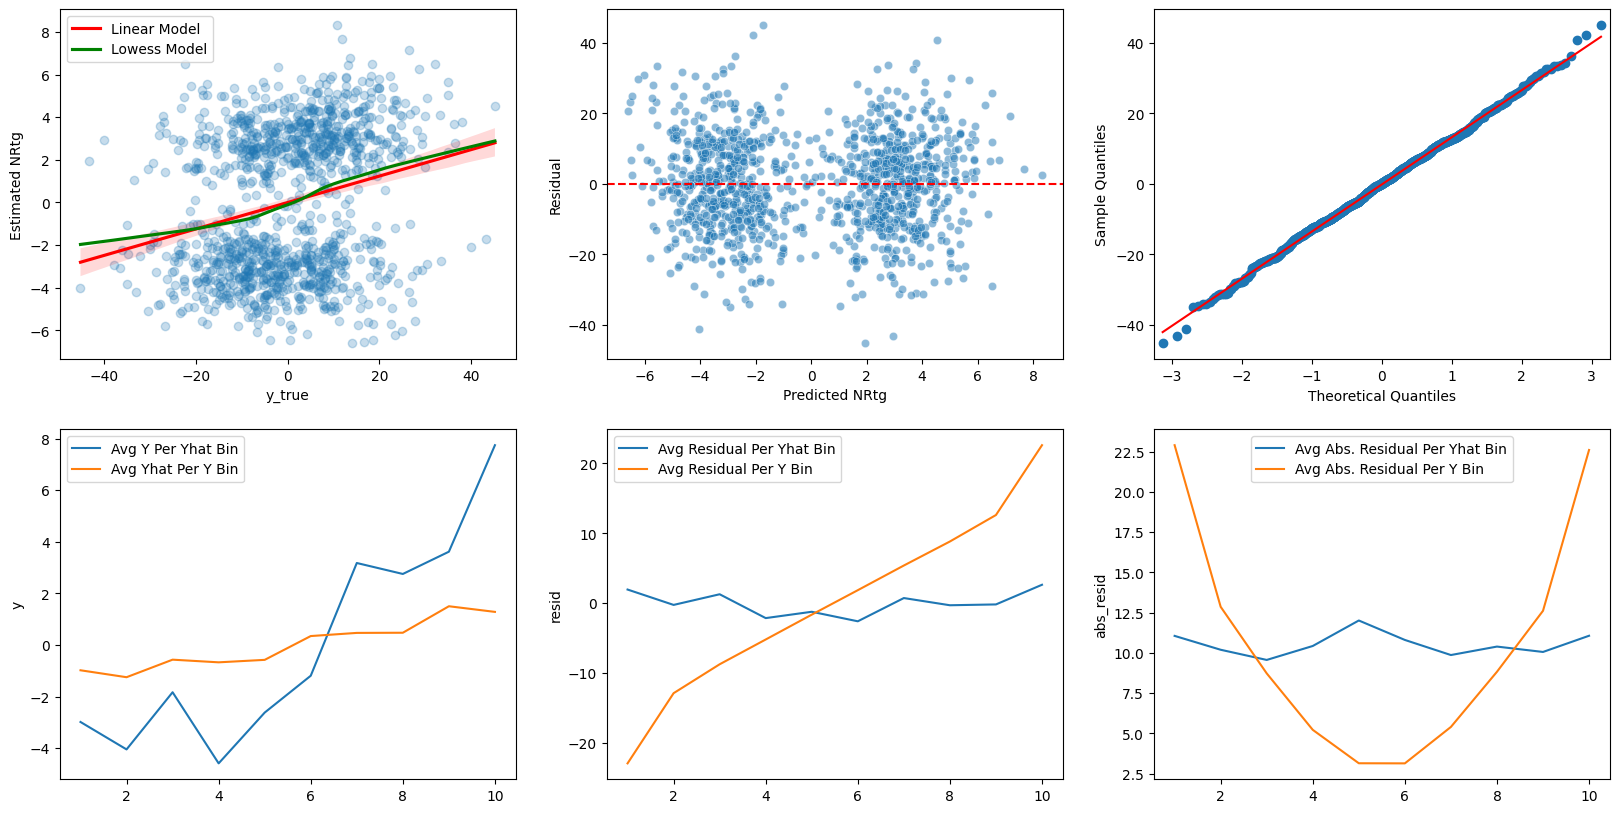

In [11]:
# Model 2 - Stack Home and Away (w/ sign changes)
X_m2b_home = df_trans[home_features]
X_m2b_away = df_trans[away_features]
X_m2b_home.columns = X_m2b_home.columns.str.replace('HOME_','')
X_m2b_away.columns = X_m2b_away.columns.str.replace('AWAY_','')
X_m2b = pd.concat([X_m2b_home, -X_m2b_away], ignore_index=True)
y_m2b = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

comp_eff_m2b = CompositeEffort(X=X_m2b, y=y_m2b)
m2b_stage1 = comp_eff_m2b.estimate_stage1_model()

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     36.98
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          1.54e-118
Time:                        22:01:09   Log-Likelihood:                -15015.
No. Observations:                3690   AIC:                         3.007e+04
Df Residuals:                    3671   BIC:                         3.019e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

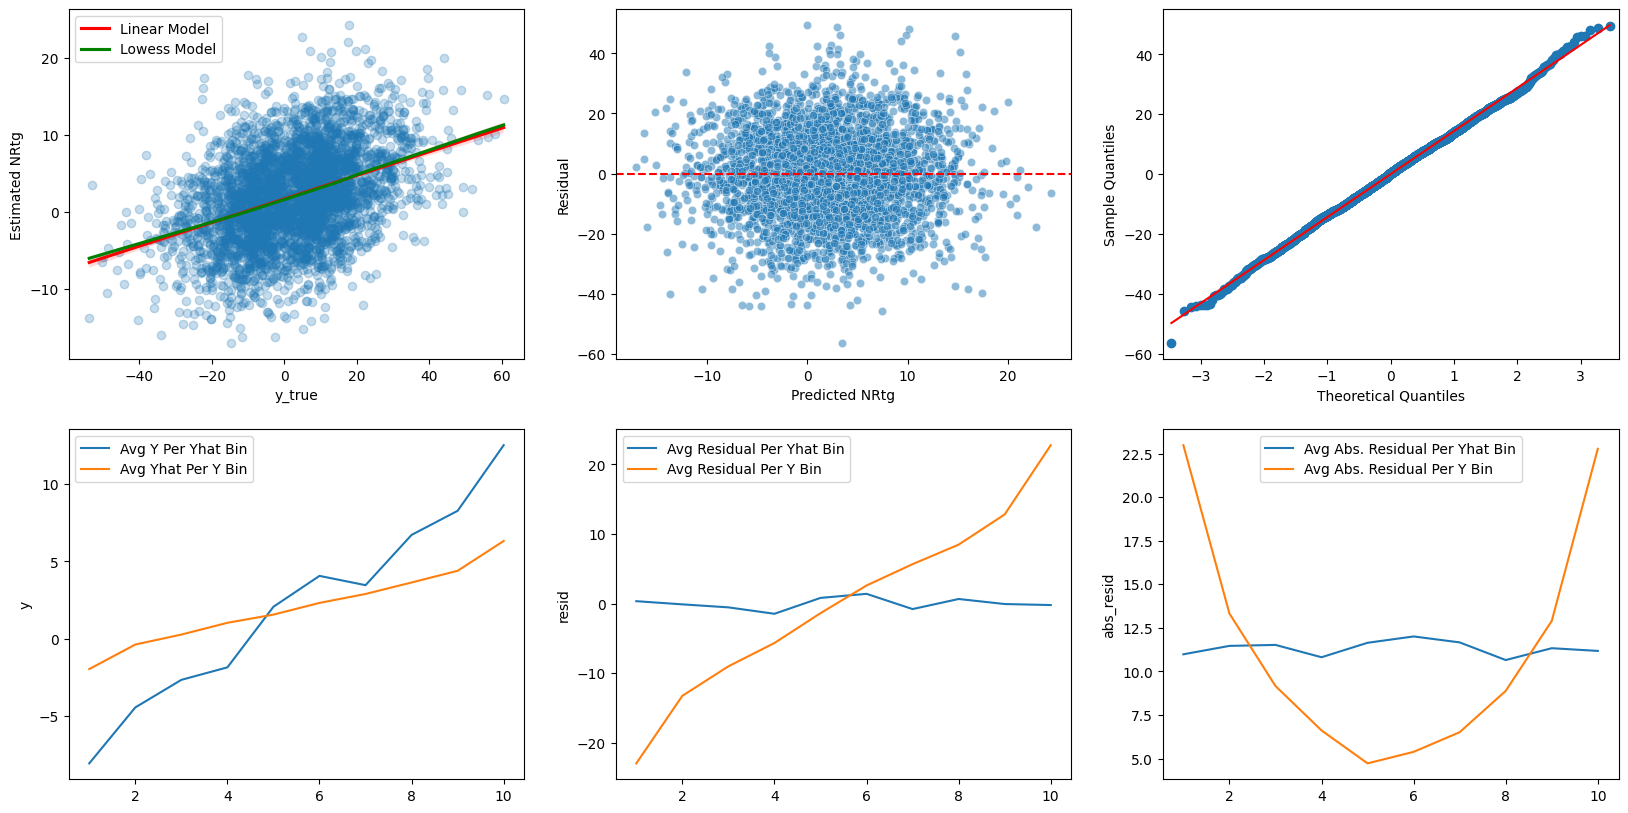

In [9]:
# Model 3 - Split Home and Away 
X_m3 = df_trans[features]
y_m3 = df_trans['HOME_NRtg']

comp_eff_m3 = CompositeEffort(X=X_m3, y=y_m3)
m3_stage1 = comp_eff_m3.estimate_stage1_model()

In [19]:
output_dir_m3 = os.path.join(DATA_DIR, 'stage1_effort_m3')
df_stage1_effort_m3 = comp_eff_m3.estimate_composite_effort(output_dir=output_dir_m3)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 19)

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.980
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           2.42e-13
Time:                        22:51:58   Log-Likelihood:                -2251.9
No. Observations:                 575   AIC:                             4542.
Df Residuals:                     556   BIC:                             4624.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

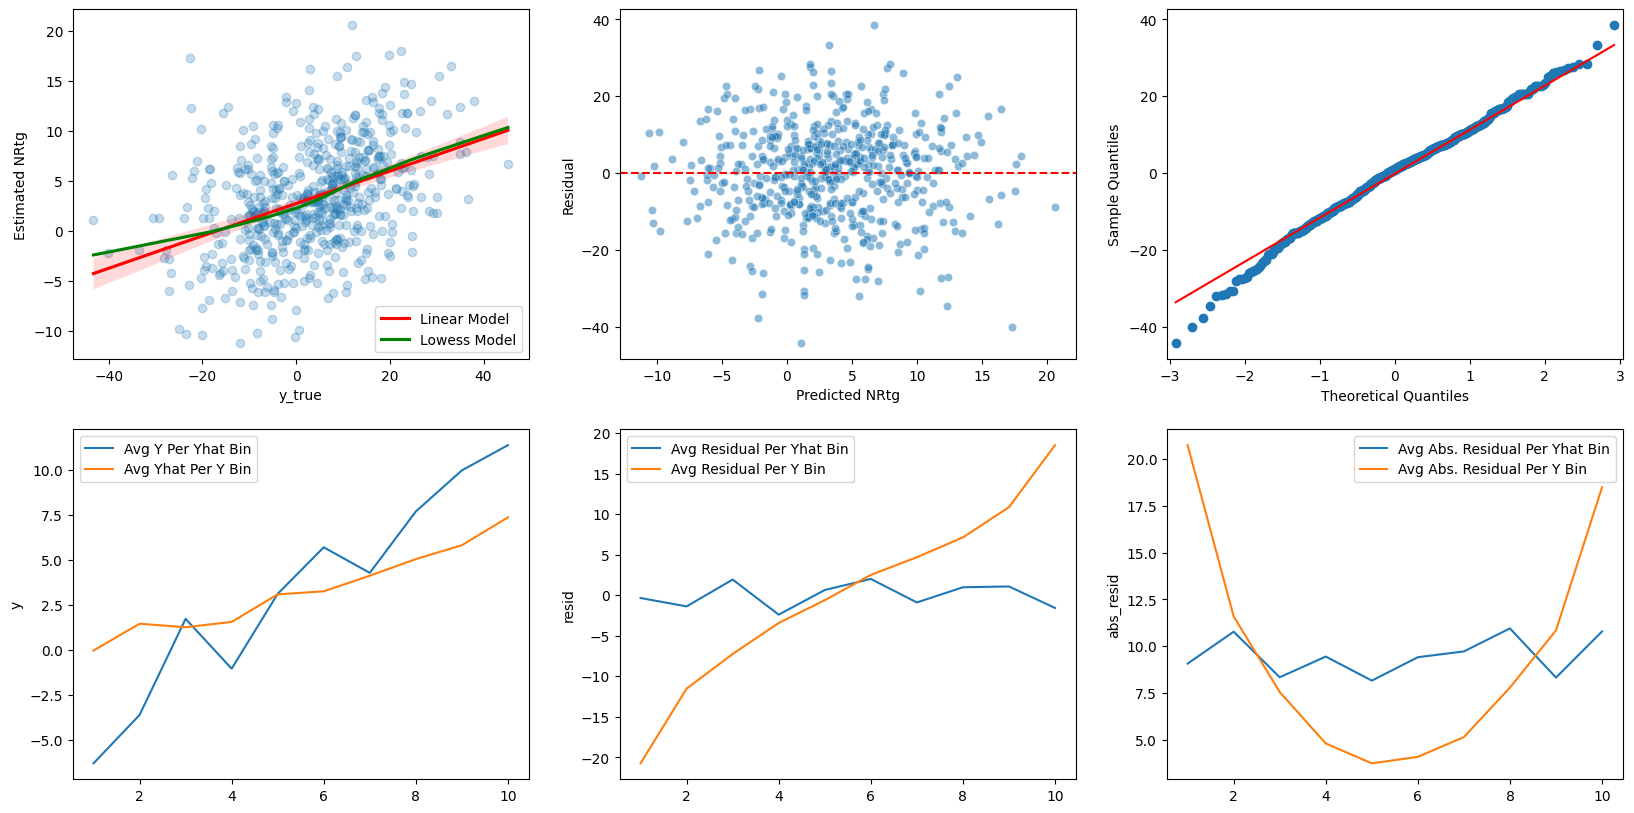

In [12]:
# Model 3 - Split Home and Away 
X_m3 = df_trans[features]
y_m3 = df_trans['HOME_NRtg']

comp_eff_m3 = CompositeEffort(X=X_m3, y=y_m3)
m3_stage1 = comp_eff_m3.estimate_stage1_model()

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     72.39
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          1.71e-123
Time:                        22:02:15   Log-Likelihood:                -15022.
No. Observations:                3690   AIC:                         3.006e+04
Df Residuals:                    3680   BIC:                         3.013e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

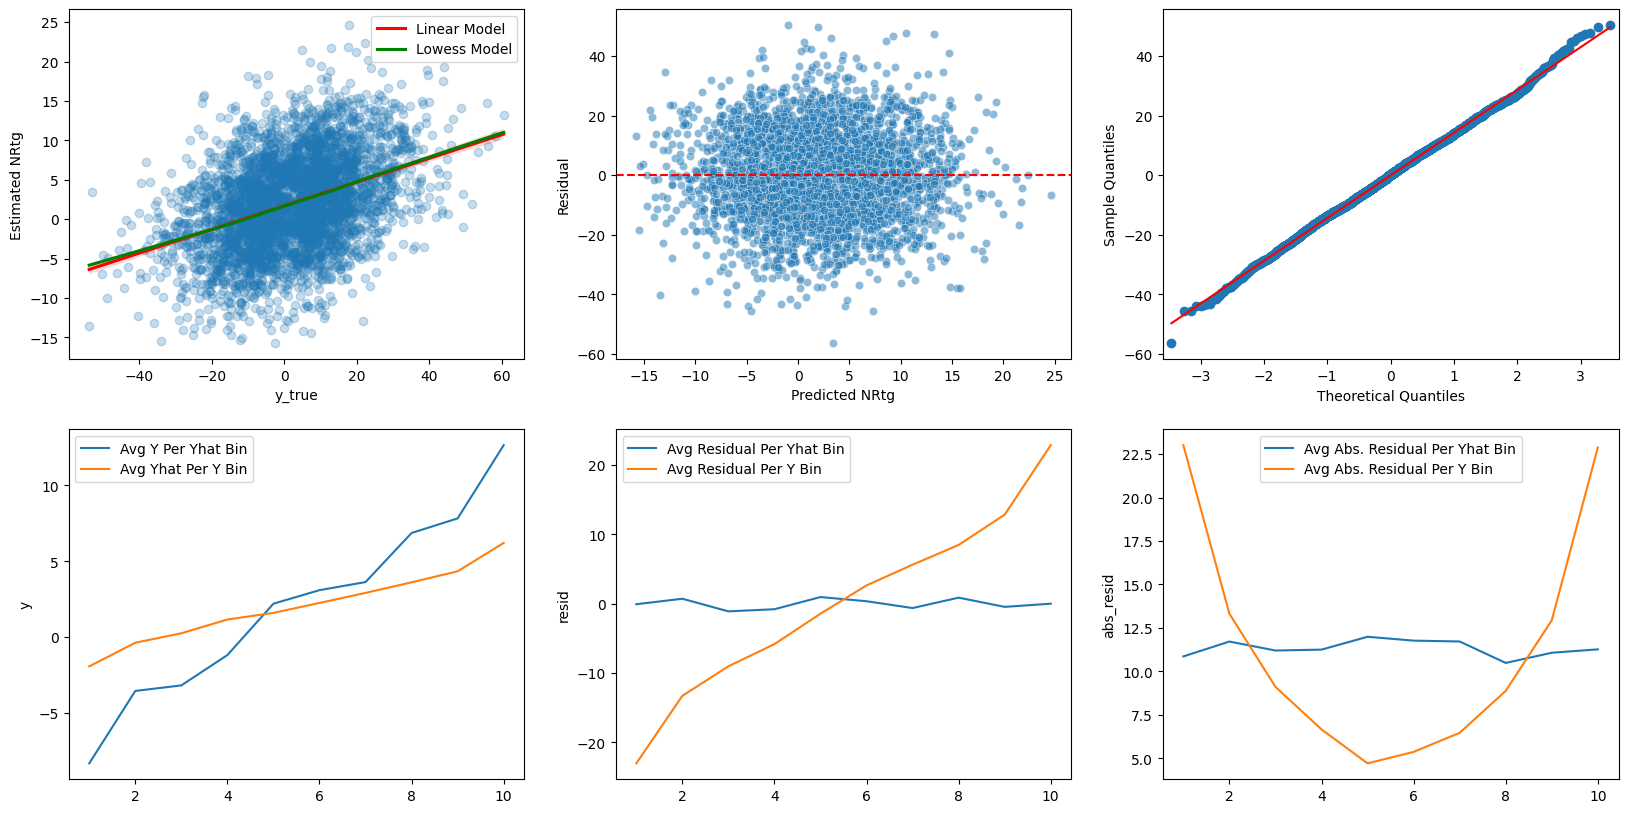

In [10]:
# Model 4 - Difference
features = list(set(hustle_stats)-set(features_to_exclude))
diff_features = [f"{feat}_DIFF" for feat in features]
X_m4 = df_trans[diff_features]
y_m4 = df_trans['HOME_NRtg']

comp_eff_m4 = CompositeEffort(X=X_m4, y=y_m4)
m4_stage1 = comp_eff_m4.estimate_stage1_model()

/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/nba_hustle_sdg/nba_hustle_sdg/src/steps/model/model.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec


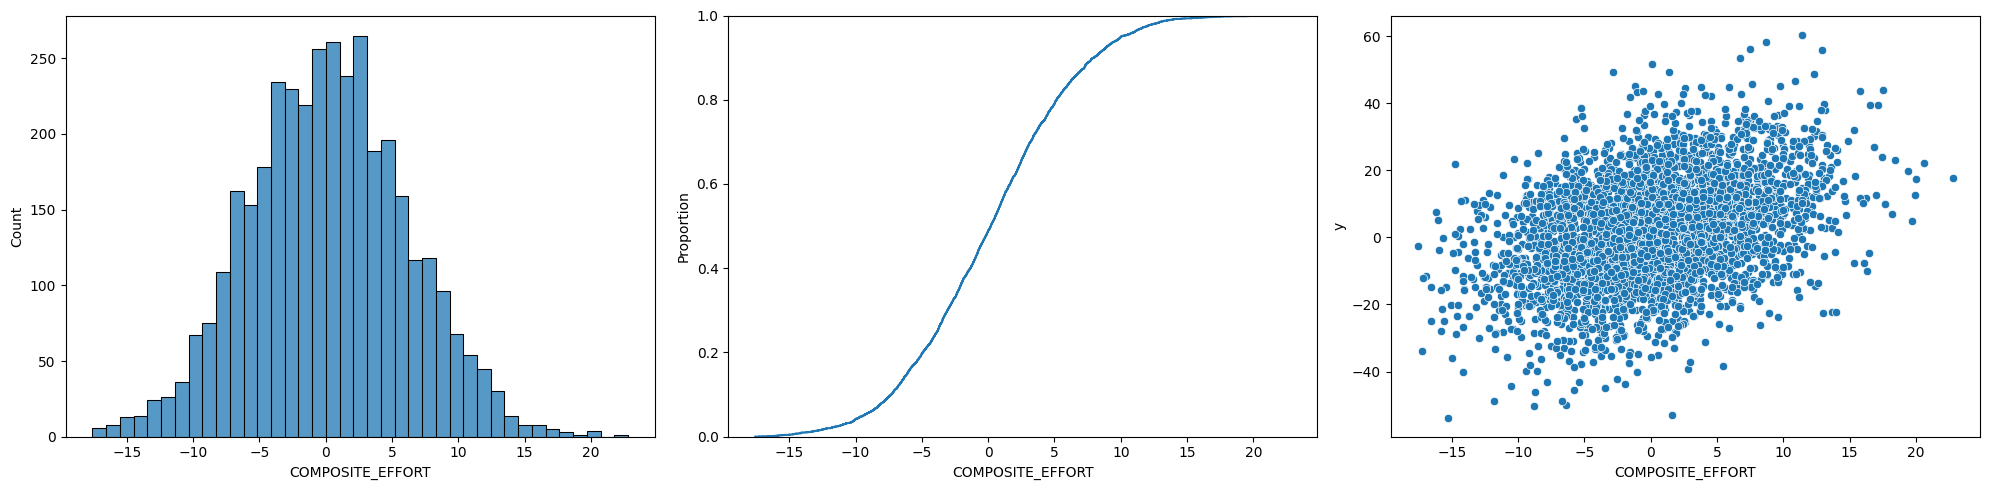

count    3690.000000
mean        0.185740
std         5.968403
min       -17.584336
0.1%      -16.693883
1%        -13.820909
5%         -9.421411
10%        -7.309594
20%        -4.937200
25%        -3.830751
30%        -3.064472
40%        -1.336931
50%         0.189015
60%         1.655267
70%         3.184749
75%         4.192090
80%         5.145818
90%         7.967313
95%        10.035205
99%        13.868338
99.9%      19.783807
max        22.808787
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.388, P-value:  0.00000
Spearman Correlation:  0.376, P-value:  0.00000
Kendall's Tau Correlation:  0.255, P-value:  0.00000


In [20]:
output_dir_m4 = os.path.join(DATA_DIR, 'stage1_effort_m4')
df_stage1_effort_m4 = comp_eff_m4.estimate_composite_effort(output_dir=output_dir_m4)

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.92
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           9.35e-16
Time:                        22:56:10   Log-Likelihood:                -2256.6
No. Observations:                 575   AIC:                             4533.
Df Residuals:                     565   BIC:                             4577.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

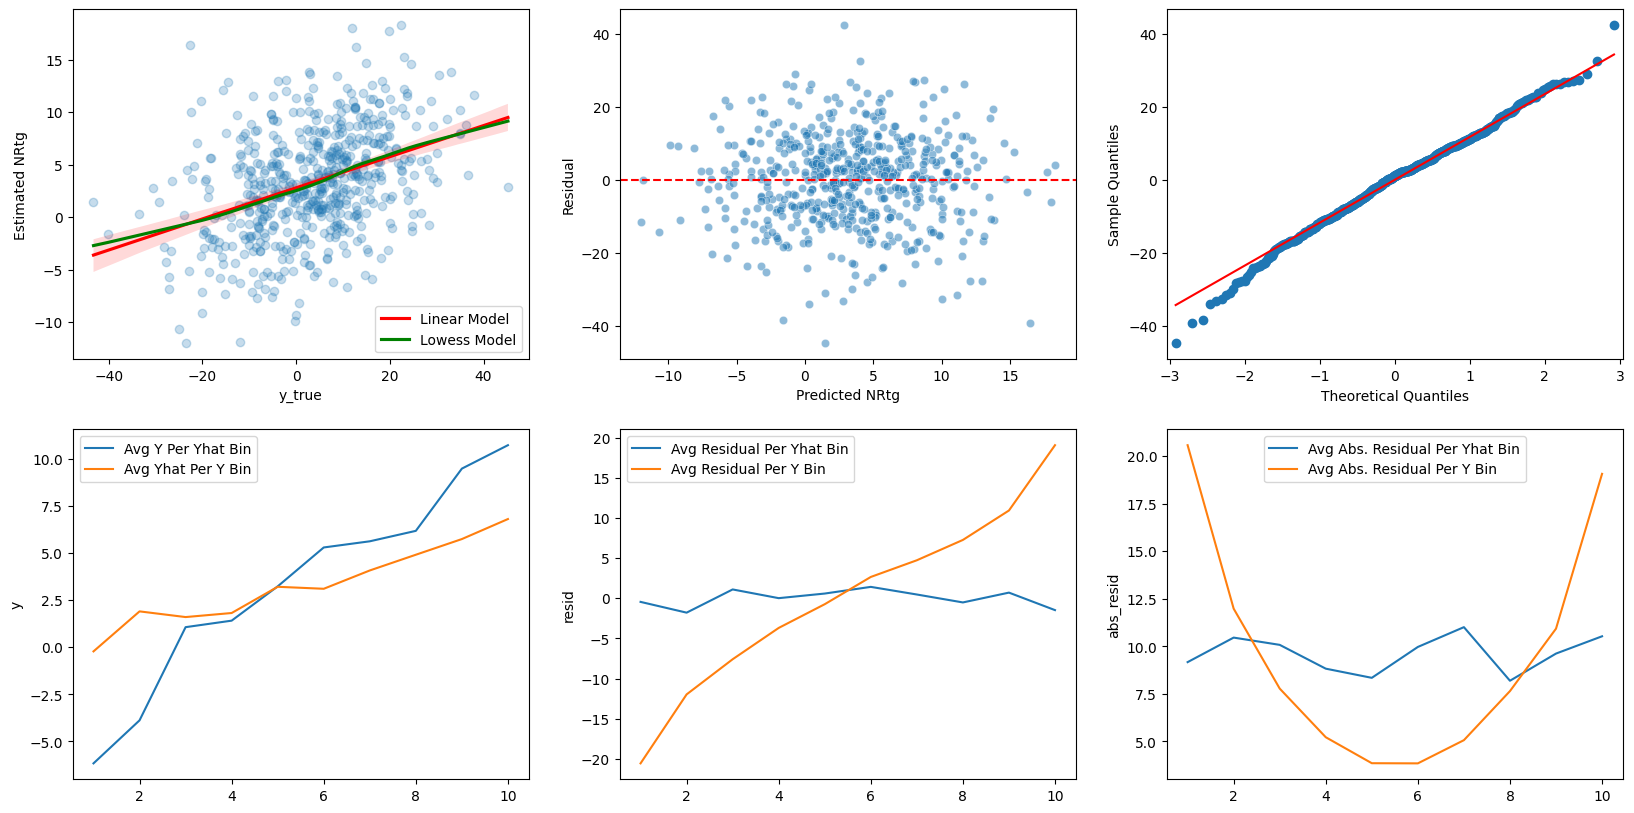

In [19]:
# Model 4 - Difference
features = list(set(hustle_stats)-set(features_to_exclude))
diff_features = [f"{feat}_DIFF" for feat in features]
X_m4 = df_trans[diff_features]
y_m4 = df_trans['HOME_NRtg']

comp_eff_m4 = CompositeEffort(X=X_m4, y=y_m4)
m4_stage1 = comp_eff_m4.estimate_stage1_model()

In [15]:
diff_features = df_trans.columns[df_trans.columns.str.contains('DIFF')]
X_m4 = df_trans[diff_features]
y_m4 = df_trans['HOME_NRtg']

In [16]:
X_m4.head(2)

SCREEN_AST_PTS_DIFF  DEFLECTIONS_DIFF  CONTESTED_SHOTS_DIFF  \
0                    3                 0                     7   
1                   35                 4                    -8   

   DEF_BOXOUTS_DIFF  CONTESTED_SHOTS_2PT_DIFF  BOX_OUT_PLAYER_TEAM_REBS_DIFF  \
0                -4                         4                             -4   
1                 0                        -5                             -1   

   CHARGES_DRAWN_DIFF  LOOSE_BALLS_RECOVERED_DIFF  OFF_BOXOUTS_DIFF  \
0                   2                           3                 0   
1                   0                          -4                 1   

   BOX_OUTS_DIFF  DEF_LOOSE_BALLS_RECOVERED_DIFF  SCREEN_ASSISTS_DIFF  \
0             -4                               1                    1   
1              1                               0                   15   

   BOX_OUT_PLAYER_REBS_DIFF  OFF_LOOSE_BALLS_RECOVERED_DIFF  \
0                        -4                               2   
1                        -1                              -4   

   CONTESTED_SHOTS_3PT_DIFF  
0                         3  
1                        -3

In [5]:
X = df_trans[features]
y = df_trans['HOME_NRtg']

SEASON_ID   GAME_ID   GAME_DATE  AWAY_TEAM_ID  HOME_TEAM_ID  \
0      22022  22200001  2022-10-18    1610612755    1610612738   
1      22022  22200002  2022-10-18    1610612747    1610612744   
2      22022  22200003  2022-10-19    1610612753    1610612765   
3      22022  22200004  2022-10-19    1610612764    1610612754   
4      22022  22200005  2022-10-19    1610612745    1610612737   

  AWAY_TEAM_ABBREVIATION HOME_TEAM_ABBREVIATION      AWAY_TEAM_NAME  \
0                    PHI                    BOS  Philadelphia 76ers   
1                    LAL                    GSW  Los Angeles Lakers   
2                    ORL                    DET       Orlando Magic   
3                    WAS                    IND  Washington Wizards   
4                    HOU                    ATL     Houston Rockets   

          HOME_TEAM_NAME  AWAY_FGM  HOME_FGM  AWAY_FGA  HOME_FGA  AWAY_FG3M  \
0         Boston Celtics        40        46        80        82         13   
1  Golden State Warriors        40        45        94        99         10   
2        Detroit Pistons        42        40        86        94         11   
3         Indiana Pacers        42        39        92        97         11   
4          Atlanta Hawks        42        45        98        90          9   

   HOME_FG3M  AWAY_FG3A  HOME_FG3A  AWAY_FTM  HOME_FTM  AWAY_FTA  HOME_FTA  \
0         12         34         35        24        22        28        28   
1         16         40         45        19        17        25        23   
2         14         30         38        14        19        19        24   
3         15         31         42        19        14        24        21   
4          7         35         25        14        20        15        24   

   AWAY_OREB  HOME_OREB  AWAY_DREB  HOME_DREB  AWAY_AST  HOME_AST  AWAY_STL  \
0          4          6         27         30        16        24         8   
1          9         11         39         37        23        31        12   
2         10         12         38         29        21        31         5   
3         14         12         39         30        21        21         5   
4         15          4         39         34        25        30         4   

   HOME_STL  AWAY_BLK  HOME_BLK  AWAY_TOV  HOME_TOV  AWAY_PF  HOME_PF  \
0         8         3         3        14        11       25       24   
1        11         4         4        22        18       18       23   
2        11         5         4        18        13       24       21   
3         7        10         5        17        15       19       20   
4        12         3         5        16         9       20       18   

   AWAY_PTS  HOME_PTS  NEUTRAL_IND  AWAY_DEF_BOXOUTS  HOME_DEF_BOXOUTS  \
0       117       126            0                 6                 2   
1       109       123            0                11                11   
2       109       113            0                12                11   
3       114       107            0                11                 5   
4       107       117            0                11                 8   

   AWAY_CONTESTED_SHOTS  HOME_CONTESTED_SHOTS  AWAY_DEFLECTIONS  \
0                    27                    34                16   
1                    71                    63                18   
2                    60                    59                11   
3                    67                    62                14   
4                    54                    67                11   

   HOME_DEFLECTIONS  AWAY_CHARGES_DRAWN  HOME_CHARGES_DRAWN  \
0                16                   0                   2   
1                22                   1                   1   
2                15                   0                   0   
3                12                   0                   1   
4                16                   0                   1   

   AWAY_DEF_LOOSE_BALLS_RECOVERED  HOME_DEF_LOOSE_BALLS_RECOVERED  \
0                        

In [32]:
X_home = X[home_features]
X_away = X[away_features]
X_home.columns = X_home.columns.str.replace('HOME_','')
X_away.columns = X_away.columns.str.replace('AWAY_','')
X_new = pd.concat([X_home, X_away], ignore_index=True)
y_new = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

In [33]:
X_new.shape, y_new.shape

((1150, 9), (1150,))

In [35]:
y_new.isna().sum()

np.int64(0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.124
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           9.35e-12
Time:                        18:00:04   Log-Likelihood:                -4604.0
No. Observations:                1150   AIC:                             9228.
Df Residuals:                    1140   BIC:                             9278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

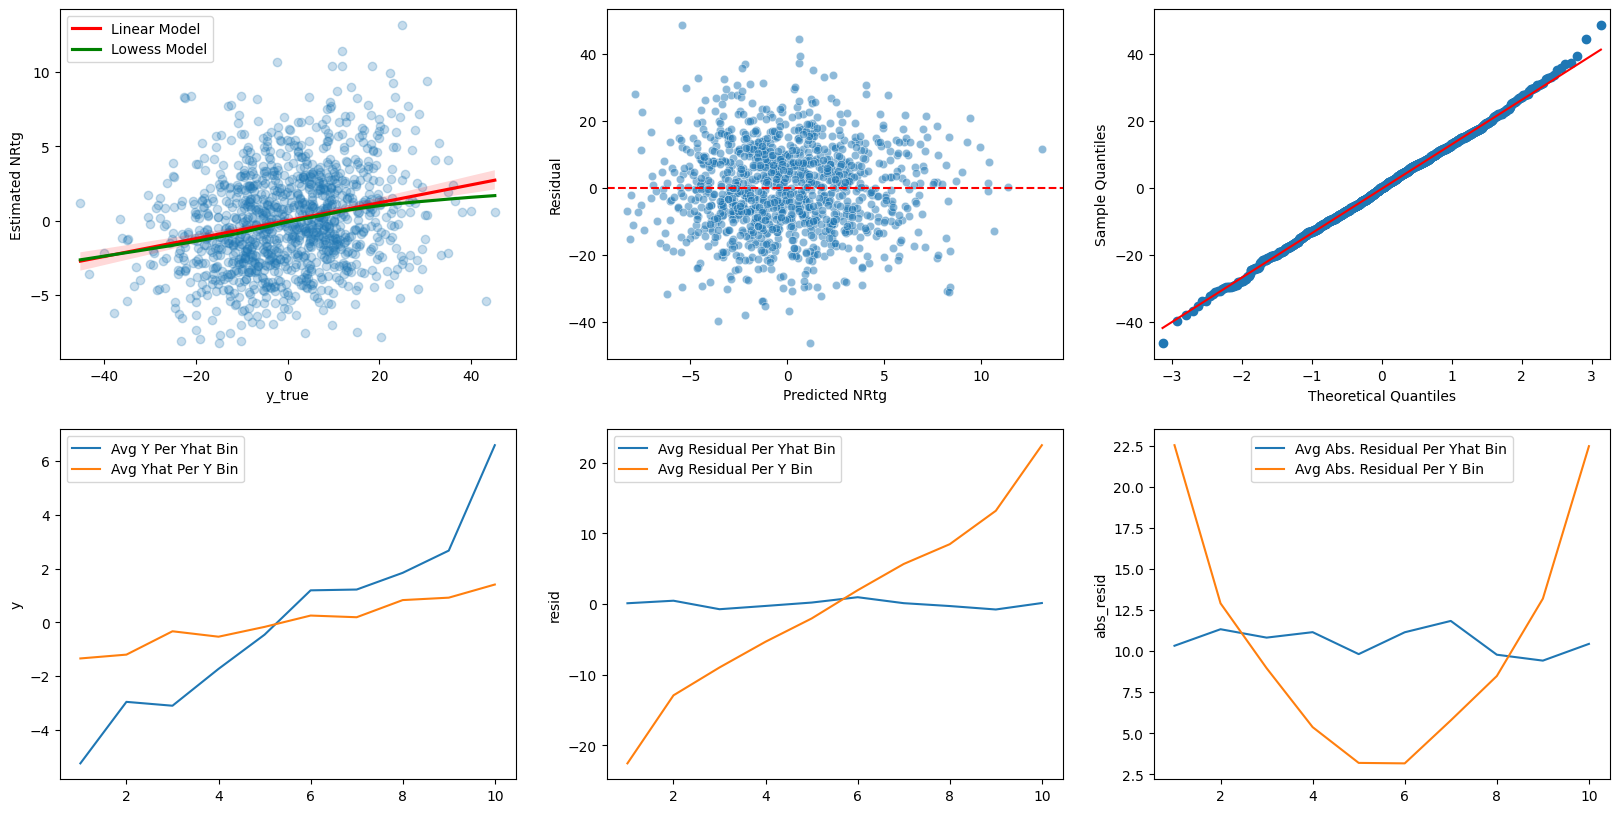

In [37]:
comp_eff_new = CompositeEffort(X=X_new, y=y_new)
model_new = comp_eff_new.estimate_stage1_model()

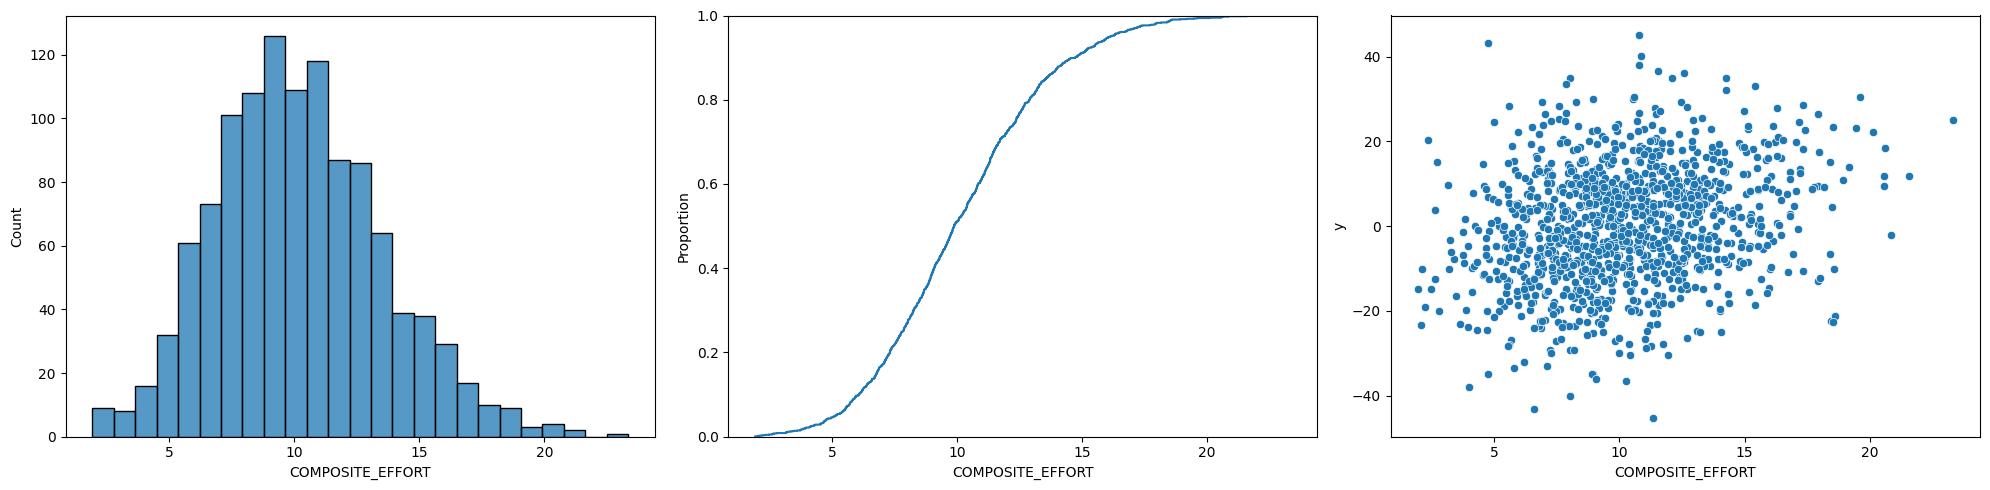

count    1150.000000
mean       10.187051
std         3.358716
min         1.929512
0.1%        2.070307
1%          3.197386
5%          5.161282
10%         6.091054
20%         7.321402
25%         7.829596
30%         8.268132
40%         9.089664
50%         9.884964
60%        10.848476
70%        11.701236
75%        12.353437
80%        12.897135
90%        14.724594
95%        16.122282
99%        18.591196
99.9%      21.482105
max        23.343188
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.245, P-value:  0.00000
Spearman Correlation:  0.240, P-value:  0.00000
Kendall's Tau Correlation:  0.161, P-value:  0.00000


In [38]:
output_dir_new = os.path.join(DATA_DIR, 'stage1_effort_new')
df_stage1_effort_new = comp_eff_new.estimate_composite_effort(output_dir=output_dir)

In [41]:
df_stage1_effort_new.head(2)

CONTESTED_SHOTS_2PT  DEF_BOXOUTS  DEF_LOOSE_BALLS_RECOVERED  CHARGES_DRAWN  \
0                   19            2                          2              2   
1                   30           11                          2              1   

   DEFLECTIONS  OFF_LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  SCREEN_ASSISTS  \
0           16                          2            0              10   
1           22                          1            3              18   

   CONTESTED_SHOTS_3PT  COMPOSITE_EFFORT  
0                   15          8.741128  
1                   33         17.222305

                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.980
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           2.42e-13
Time:                        17:36:19   Log-Likelihood:                -2251.9
No. Observations:                 575   AIC:                             4542.
Df Residuals:                     556   BIC:                             4624.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

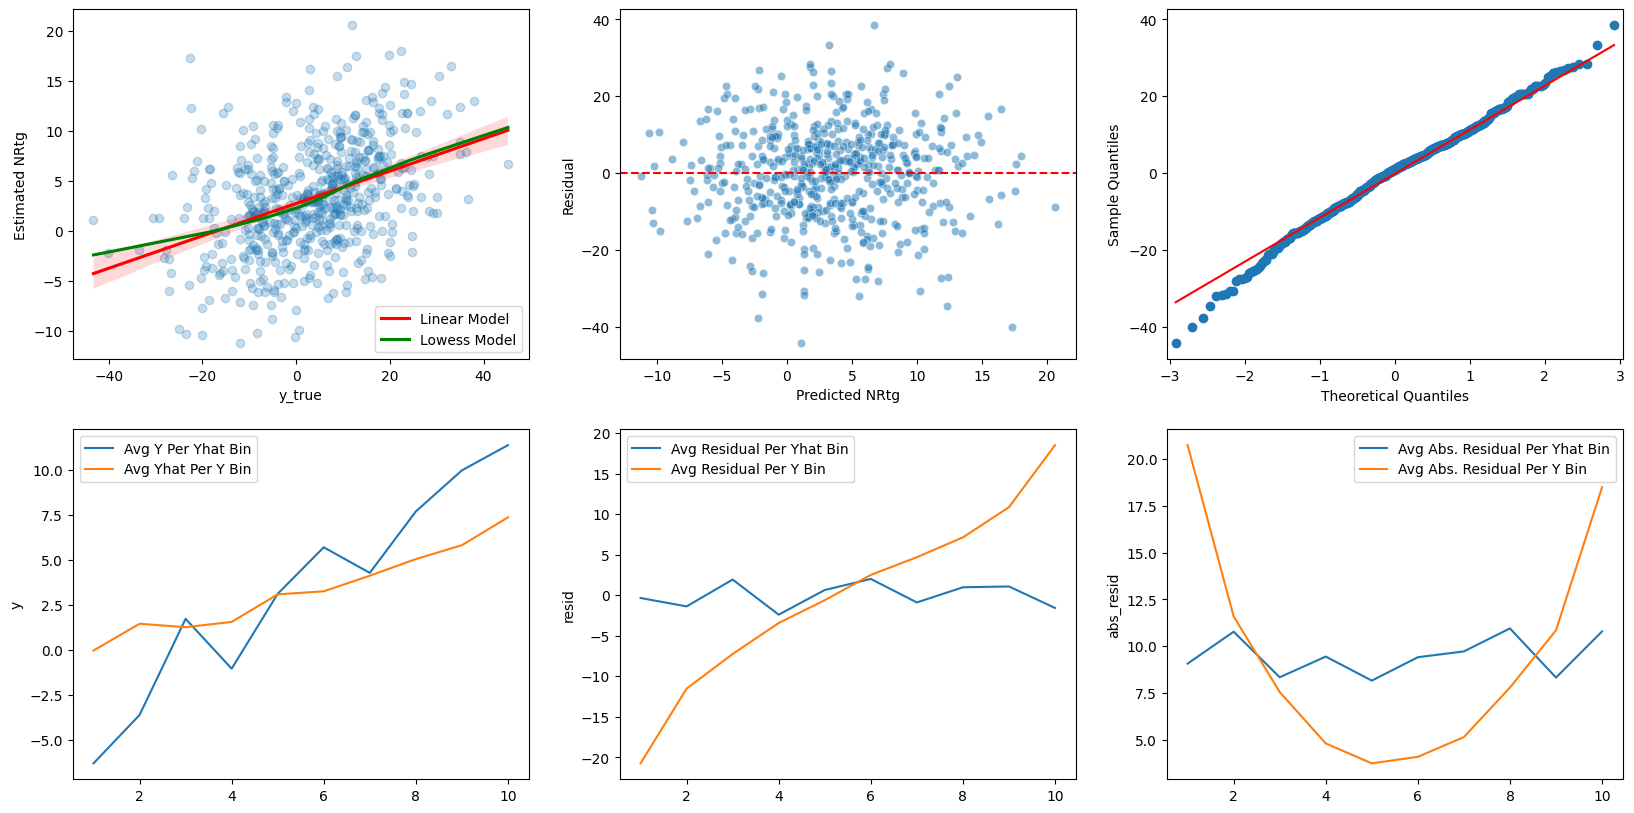

In [6]:
comp_eff = CompositeEffort(X=X, y=y)
model = comp_eff.estimate_stage1_model()

/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/nba_hustle_sdg/nba_hustle_sdg/src/steps/model/model.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec


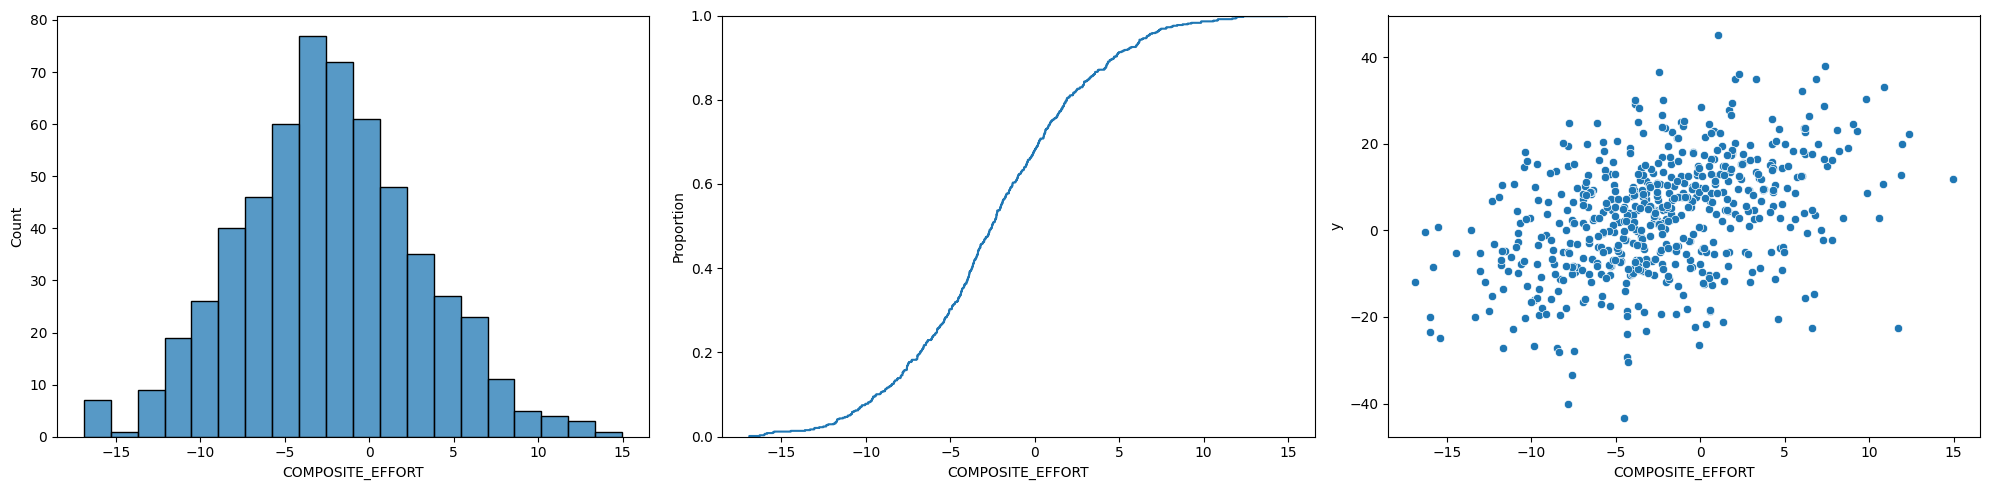

count    575.000000
mean      -2.359284
std        5.350828
min      -16.900085
0.1%     -16.548443
1%       -15.454237
5%       -10.970915
10%       -9.293633
20%       -6.774476
25%       -5.788882
30%       -5.056424
40%       -3.718243
50%       -2.535766
60%       -1.323113
70%        0.248720
75%        0.994090
80%        1.884690
90%        4.685569
95%        6.631251
99%       10.822938
99.9%     13.457588
max       14.963169
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.403, P-value:  0.00000
Spearman Correlation:  0.406, P-value:  0.00000
Kendall's Tau Correlation:  0.281, P-value:  0.00000


In [7]:
output_dir = os.path.join(DATA_DIR, 'stage1_effort')
df_stage1_effort = comp_eff.estimate_composite_effort(output_dir=output_dir)

In [8]:
df_stage1_effort.head(2)

HOME_CONTESTED_SHOTS_2PT  HOME_DEF_BOXOUTS  HOME_DEF_LOOSE_BALLS_RECOVERED  \
0                        19                 2                               2   
1                        30                11                               2   

   HOME_CHARGES_DRAWN  HOME_DEFLECTIONS  HOME_OFF_LOOSE_BALLS_RECOVERED  \
0                   2                16                               2   
1                   1                22                               1   

   HOME_OFF_BOXOUTS  HOME_SCREEN_ASSISTS  HOME_CONTESTED_SHOTS_3PT  \
0                 0                   10                        15   
1                 3                   18                        33   

   AWAY_CONTESTED_SHOTS_2PT  AWAY_DEF_BOXOUTS  AWAY_DEF_LOOSE_BALLS_RECOVERED  \
0                        15                 6                               1   
1                        35                11                               2   

   AWAY_CHARGES_DRAWN  AWAY_DEFLECTIONS  AWAY_OFF_LOOSE_BALLS_RECOVERED  \
0                   0                16                               0   
1                   1                18                               5   

   AWAY_OFF_BOXOUTS  AWAY_SCREEN_ASSISTS  AWAY_CONTESTED_SHOTS_3PT  \
0                 0                    9                        12   
1                 2                    3                        36   

   COMPOSITE_EFFORT  
0         -1.124029  
1          3.276873

In [9]:
df_trans.shape, df_stage1_effort.shape

((575, 89), (575, 19))

In [21]:
df_stage1_effort_m4.head(2)

CHARGES_DRAWN_DIFF  CONTESTED_SHOTS_2PT_DIFF  \
0                   2                         4   
1                   0                        -5   

   OFF_LOOSE_BALLS_RECOVERED_DIFF  SCREEN_ASSISTS_DIFF  \
0                               2                    1   
1                              -4                   15   

   CONTESTED_SHOTS_3PT_DIFF  DEFLECTIONS_DIFF  OFF_BOXOUTS_DIFF  \
0                         3                 0                 0   
1                        -3                 4                 1   

   DEF_BOXOUTS_DIFF  DEF_LOOSE_BALLS_RECOVERED_DIFF  COMPOSITE_EFFORT  
0                -4                               1          1.098327  
1                 0                               0          4.213118

In [23]:
df_m4 = pd.concat([df_trans,df_stage1_effort_m4['COMPOSITE_EFFORT']], axis=1) 

In [13]:
#df_m = pd.concat([df_trans, df_stage1_effort['COMPOSITE_EFFORT']], axis=1)

In [24]:
df_m4.isna().sum()

SEASON_ID                         0
GAME_ID                           0
GAME_DATE                         0
AWAY_TEAM_ID                      0
HOME_TEAM_ID                      0
                                 ..
SCREEN_ASSISTS_DIFF               0
BOX_OUT_PLAYER_REBS_DIFF          0
OFF_LOOSE_BALLS_RECOVERED_DIFF    0
CONTESTED_SHOTS_3PT_DIFF          0
COMPOSITE_EFFORT                  0
Length: 90, dtype: int64

In [16]:
df_m.head(2)

SEASON_ID   GAME_ID   GAME_DATE  AWAY_TEAM_ID  HOME_TEAM_ID  \
0      22022  22200001  2022-10-18    1610612755    1610612738   
1      22022  22200002  2022-10-18    1610612747    1610612744   

  AWAY_TEAM_ABBREVIATION HOME_TEAM_ABBREVIATION      AWAY_TEAM_NAME  \
0                    PHI                    BOS  Philadelphia 76ers   
1                    LAL                    GSW  Los Angeles Lakers   

          HOME_TEAM_NAME  AWAY_FGM  HOME_FGM  AWAY_FGA  HOME_FGA  AWAY_FG3M  \
0         Boston Celtics        40        46        80        82         13   
1  Golden State Warriors        40        45        94        99         10   

   HOME_FG3M  AWAY_FG3A  HOME_FG3A  AWAY_FTM  HOME_FTM  AWAY_FTA  HOME_FTA  \
0         12         34         35        24        22        28        28   
1         16         40         45        19        17        25        23   

   AWAY_OREB  HOME_OREB  AWAY_DREB  HOME_DREB  AWAY_AST  HOME_AST  AWAY_STL  \
0          4          6         27         30        16        24         8   
1          9         11         39         37        23        31        12   

   HOME_STL  AWAY_BLK  HOME_BLK  AWAY_TOV  HOME_TOV  AWAY_PF  HOME_PF  \
0         8         3         3        14        11       25       24   
1        11         4         4        22        18       18       23   

   AWAY_PTS  HOME_PTS  NEUTRAL_IND  AWAY_DEF_BOXOUTS  HOME_DEF_BOXOUTS  \
0       117       126            0                 6                 2   
1       109       123            0                11                11   

   AWAY_CONTESTED_SHOTS  HOME_CONTESTED_SHOTS  AWAY_DEFLECTIONS  \
0                    27                    34                16   
1                    71                    63                18   

   HOME_DEFLECTIONS  AWAY_CHARGES_DRAWN  HOME_CHARGES_DRAWN  \
0                16                   0                   2   
1                22                   1                   1   

   AWAY_DEF_LOOSE_BALLS_RECOVERED  HOME_DEF_LOOSE_BALLS_RECOVERED  \
0                               1                               2   
1                               2                               2   

   AWAY_SCREEN_AST_PTS  HOME_SCREEN_AST_PTS  AWAY_OFF_BOXOUTS  \
0                   19                   22                 0   
1                    8                   43                 2   

   HOME_OFF_BOXOUTS  AWAY_BOX_OUT_PLAYER_TEAM_REBS  \
0                 0                              6   
1                 3                             13   

   HOME_BOX_OUT_PLAYER_TEAM_REBS  AWAY_BOX_OUTS  HOME_BOX_OUTS  \
0                              2              6              2   
1                             12             13             14   

   AWAY_BOX_OUT_PLAYER_REBS  HOME_BOX_OUT_PLAYER_REBS  AWAY_SCREEN_ASSISTS  \
0                         4                         0                    9   
1                         7                         6                    3   

   HOME_SCREEN_ASSISTS  AWAY_LOOSE_BALLS_RECOVERED  \
0                   10                           1   
1                   18                           7   

   HOME_LOOSE_BALLS_RECOVERED  AWAY_CONTESTED_SHOTS_3PT  \
0                           4                        12   
1                           3                        36   

   HOME_CONTESTED_SHOTS_3PT  AWAY_CONTESTED_SHOTS_2PT  \
0                        15                        15   
1                        33                        35   

   HOME_CONTESTED_SHOTS_2PT  AWAY_OFF_LOOSE_BALLS_RECOVERED  \
0                        19                               0   
1                        30                               5   

   HOME_OFF_LOOSE_BALLS_RECOVERED  HOME_POSS  AWAY_POSS   HOME_ORtg  \
0                               2      99.32     102.32  126.862666   
1                               1     116.12     118.00  105.924905   

    AWAY_ORtg  HOME_NRtg  AWAY_NRtg  SCREEN_AST_PTS_DIFF  DEFLECTIONS_DIFF  \
0  114.347146  12.515520 -12.515520             

In [25]:
def create_four_factors(df: pd.DataFrame) -> pd.DataFrame:
    # EFG_PCT = (FGM + 0.5 x 3PM) / FGA
    df['HOME_EFG_PCT'] = (df['HOME_FGM']+.5*df['HOME_FG3M'])/df['HOME_FGA']
    df['AWAY_EFG_PCT'] = (df['AWAY_FGM']+.5*df['AWAY_FG3M'])/df['AWAY_FGA']
    df['EFG_PCT_DIFF'] = df['HOME_EFG_PCT'] - df['AWAY_EFG_PCT']

    # FTA_RATE = FTA / FGA
    df['HOME_FTA_RATE'] = df['HOME_FTA']/df['HOME_FGA']
    df['AWAY_FTA_RATE'] = df['AWAY_FTA']/df['AWAY_FGA']
    df['FTA_RATE_DIFF'] = df['HOME_FTA_RATE'] - df['AWAY_FTA_RATE']

    # TM_TOV_PCT = TOV / POSS
    df['HOME_TOV_PCT'] = df['HOME_TOV']/df['HOME_POSS']
    df['AWAY_TOV_PCT'] = df['AWAY_TOV']/df['AWAY_POSS']
    df['TOV_PCT_DIFF'] = df['HOME_TOV_PCT'] - df['AWAY_TOV_PCT']

    # OREB_PCT = OREB / (OREB + Opp DREB) - technically need available rebounds, but good enough for now...
    df['HOME_OREB_PCT'] = df['HOME_OREB']/(df['HOME_OREB'] + df['AWAY_DREB'])
    df['AWAY_OREB_PCT'] = df['AWAY_OREB']/(df['AWAY_OREB'] + df['HOME_DREB'])
    df['OREB_PCT_DIFF'] = df['HOME_OREB_PCT'] - df['AWAY_OREB_PCT']
    

    return df

In [26]:
df_m4_ff = create_four_factors(df=df_m4)

In [27]:
df_m4_ff.head()

SEASON_ID   GAME_ID   GAME_DATE  AWAY_TEAM_ID  HOME_TEAM_ID  \
0      22022  22200001  2022-10-18    1610612755    1610612738   
1      22022  22200002  2022-10-18    1610612747    1610612744   
2      22022  22200003  2022-10-19    1610612753    1610612765   
3      22022  22200004  2022-10-19    1610612764    1610612754   
4      22022  22200005  2022-10-19    1610612745    1610612737   

  AWAY_TEAM_ABBREVIATION HOME_TEAM_ABBREVIATION      AWAY_TEAM_NAME  \
0                    PHI                    BOS  Philadelphia 76ers   
1                    LAL                    GSW  Los Angeles Lakers   
2                    ORL                    DET       Orlando Magic   
3                    WAS                    IND  Washington Wizards   
4                    HOU                    ATL     Houston Rockets   

          HOME_TEAM_NAME  AWAY_FGM  HOME_FGM  AWAY_FGA  HOME_FGA  AWAY_FG3M  \
0         Boston Celtics        40        46        80        82         13   
1  Golden State Warriors        40        45        94        99         10   
2        Detroit Pistons        42        40        86        94         11   
3         Indiana Pacers        42        39        92        97         11   
4          Atlanta Hawks        42        45        98        90          9   

   HOME_FG3M  AWAY_FG3A  HOME_FG3A  AWAY_FTM  HOME_FTM  AWAY_FTA  HOME_FTA  \
0         12         34         35        24        22        28        28   
1         16         40         45        19        17        25        23   
2         14         30         38        14        19        19        24   
3         15         31         42        19        14        24        21   
4          7         35         25        14        20        15        24   

   AWAY_OREB  HOME_OREB  AWAY_DREB  HOME_DREB  AWAY_AST  HOME_AST  AWAY_STL  \
0          4          6         27         30        16        24         8   
1          9         11         39         37        23        31        12   
2         10         12         38         29        21        31         5   
3         14         12         39         30        21        21         5   
4         15          4         39         34        25        30         4   

   HOME_STL  AWAY_BLK  HOME_BLK  AWAY_TOV  HOME_TOV  AWAY_PF  HOME_PF  \
0         8         3         3        14        11       25       24   
1        11         4         4        22        18       18       23   
2        11         5         4        18        13       24       21   
3         7        10         5        17        15       19       20   
4        12         3         5        16         9       20       18   

   AWAY_PTS  HOME_PTS  NEUTRAL_IND  AWAY_CHARGES_DRAWN  HOME_CHARGES_DRAWN  \
0       117       126            0                   0                   2   
1       109       123            0                   1                   1   
2       109       113            0                   0                   0   
3       114       107            0                   0                   1   
4       107       117            0                   0                   1   

   AWAY_CONTESTED_SHOTS  HOME_CONTESTED_SHOTS  AWAY_DEF_LOOSE_BALLS_RECOVERED  \
0                    27                    34                               1   
1                    71                    63                               2   
2                    60                    59                               1   
3                    67                    62                               2   
4                    54                    67                               2   

   HOME_DEF_LOOSE_BALLS_RECOVERED  AWAY_SCREEN_AST_PTS  HOME_SCREEN_AST_PTS  \
0                               2                   19                   22   
1                               2                    8                   43   
2                               4                   26                   19   
3                               2                

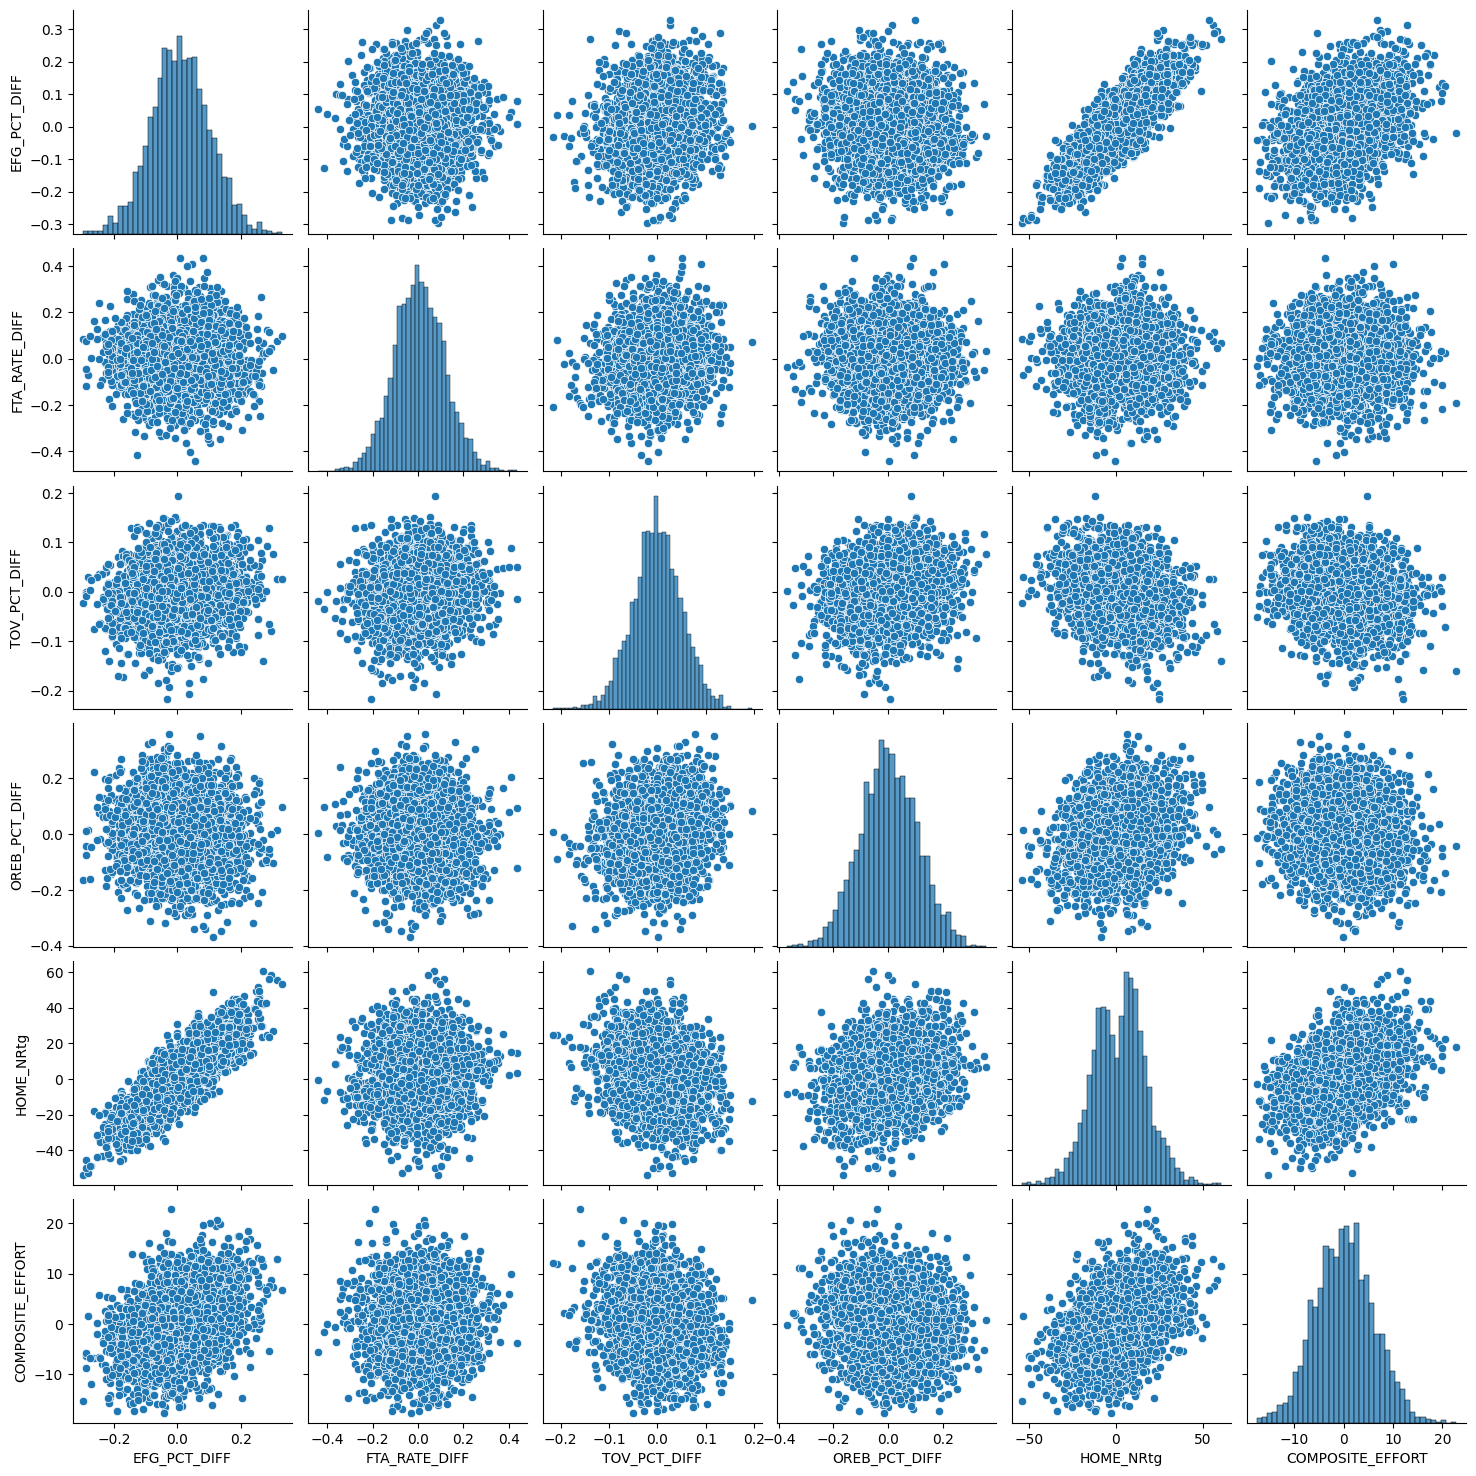

In [28]:
four_factors = ['EFG_PCT','FTA_RATE','TOV_PCT','OREB_PCT']
diff_ff = [f"{factor}_DIFF" for factor in four_factors]
sns.pairplot(df_m4_ff[diff_ff + ['HOME_NRtg'] + ['COMPOSITE_EFFORT']])

In [29]:

home_ff = [f"HOME_{factor}" for factor in four_factors]
away_ff = [f"AWAY_{factor}" for factor in four_factors]
X_home_stage2 = df_m4_ff[home_ff + ['COMPOSITE_EFFORT']]
X_away_stage2 = df_m4_ff[away_ff + ['COMPOSITE_EFFORT']]
X_home_stage2.columns = X_home_stage2.columns.str.replace('HOME_','')
X_away_stage2.columns = X_away_stage2.columns.str.replace('AWAY_','')
X_stage2 = pd.concat([X_home_stage2, X_away_stage2], ignore_index=True)

In [30]:
X_stage2.head(2)

EFG_PCT  FTA_RATE   TOV_PCT  OREB_PCT  COMPOSITE_EFFORT
0  0.634146  0.341463  0.110753  0.181818          1.098327
1  0.535354  0.232323  0.155012  0.220000          4.213118

In [35]:
X1_stage2_norm

const   EFG_PCT  FTA_RATE   TOV_PCT  OREB_PCT  COMPOSITE_EFFORT
0       1.0  1.334345  1.001487 -0.707538 -0.807268          0.152913
1       1.0 -0.165785 -0.253007  0.477558 -0.302773          0.674829
2       1.0 -0.702614  0.011316 -0.375521 -0.038514          0.611025
3       1.0 -1.015699 -0.434943  0.003623 -0.100692         -0.566039
4       1.0 -0.112102  0.141748 -1.390164 -1.980511          0.577356
...     ...       ...       ...       ...       ...               ...
7375    1.0 -0.228095  1.386968  2.125927 -0.206679          1.520789
7376    1.0 -0.167945  1.933354  1.615373 -0.640437         -0.751468
7377    1.0  2.613564  0.379562  0.446339  0.919426          0.349456
7378    1.0 -0.172919  0.685279 -0.354141 -1.365955         -1.486854
7379    1.0 -1.888912  0.069909  0.446339  1.118759          2.045485

[7380 rows x 6 columns]

In [34]:
y_m4

0       12.515520
1       13.552024
2        0.561215
3      -10.045984
4        9.511681
          ...    
3685    36.285151
3686    -9.864082
3687    -8.172890
3688    -5.814171
3689    16.430552
Name: HOME_NRtg, Length: 3690, dtype: float64

In [33]:
X_stage2_norm = (X_stage2 - X_stage2.mean())/X_stage2.std()
X1_stage2_norm = sm.add_constant(X_stage2_norm)
X1_stage2 = sm.add_constant(X_stage2)
reg_stage2_norm = sm.OLS(endog=y_m4, exog=X1_stage2_norm).fit()
reg_stage2 = sm.OLS(endog=y_m4, exog=X1_stage2).fit()
print(reg_stage2_norm.summary())
print(reg_stage2.summary())

ValueError: The indices for endog and exog are not aligned

In [57]:
for factor in four_factors: 
    reg_ff = sm.OLS(endog=X1_stage2['COMPOSITE_EFFORT'], exog=X1_stage2[['const',factor]]).fit()
    print(reg_ff.summary())

                            OLS Regression Results                            
Dep. Variable:       COMPOSITE_EFFORT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3347
Date:                Sun, 31 Aug 2025   Prob (F-statistic):              0.563
Time:                        18:18:46   Log-Likelihood:                -3559.4
No. Observations:                1150   AIC:                             7123.
Df Residuals:                    1148   BIC:                             7133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1180      1.321     -2.360      0.0

In [68]:
# Diff Models
X_diff_stage2 = df_m2[diff_ff + ['COMPOSITE_EFFORT']]
X1_diff_stage2 = sm.add_constant(X_diff_stage2)
reg_diff_stage2 = sm.OLS(endog=df_m2['HOME_NRtg'], exog=X1_diff_stage2).fit()
print(reg_diff_stage2.summary())


                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:29:54   Log-Likelihood:                -1473.6
No. Observations:                 575   AIC:                             2959.
Df Residuals:                     569   BIC:                             2985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3554      0.156  

In [53]:
four_factors

['EFG_PCT', 'FTA_RATE', 'TOV_PCT', 'OREB_PCT']